In [8]:
from scipy.optimize import minimize
import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:


# Definindo a função objetivo
def objective_function(x):
    return (x[0] - 5)**2 + (x[1] - 5)**2

# Definindo as restrições
def constraint1(x):
    return x[0]**2 + x[1]**2 - 25

def constraint2(x):
    return -(x[0]**2 + x[1]**2 - 16)

# Definindo os limites das variáveis
bounds = [(6, 10), (6, 10)]

# Definindo as restrições no formato necessário para a função minimize
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]

# Ponto inicial para a otimização
x0 = [7, 7]

# Executando a otimização
solution = minimize(objective_function, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Exibindo os resultados
print('Solução:')
print('x1 =', solution.x[0])
print('x2 =', solution.x[1])
print('Função objetivo =', solution.fun)

Solução:
x1 = 6.0
x2 = 6.0
Função objetivo = 2.0


In [9]:
# Definindo as variáveis
P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target= sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 C L target')

# Definindo a função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3) 
           - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 
           - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 
           + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 
           + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26) * (P - C) - L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3) 
             - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 
             + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 
             + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 
                - 0.8459 * X25 - 0.7094 * X26) - target)

# Derivando F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dL, 'numpy')


In [5]:
import sympy as sp
import numpy as np

# Definindo as variáveis
P, X1, C, Lambda, K = sp.symbols('P X1 C Lambda K')

# Definindo a função F usando sympy
F = (sp.exp(0.64 + 0.4 * X1 - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X1 - 0.005 * P))) * (P - C) - Lambda * (sp.exp(0.64 + 0.4 * X1 - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X1 - 0.005 * P)) - K)

# Derivando F em relação a P
dF_dP = sp.diff(F, P)

# Derivando F em relação a Lambda
dF_dLambda = sp.diff(F, Lambda)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X1, C, Lambda, K), dF_dP, 'numpy')
dF_dLambda_func = sp.lambdify((P, X1, C, Lambda, K), dF_dLambda, 'numpy')

# Exemplo de uso das funções
P_vals = [287.5960434220056, 257.7833159899672]
X_vals = [1, 0]
C_val = 150
Lambda_val = -166.01295948174976
K_val = 0.74503

# Calculando as derivadas para cada valor de P e X1
dF_dP_results = [dF_dP_func(P, X, C_val, Lambda_val, K_val) for P, X in zip(P_vals, X_vals)]
dF_dLambda_results = [dF_dLambda_func(P, X, C_val, Lambda_val, K_val) for P, X in zip(P_vals, X_vals)]

print("Derivada de F em relação a P:", dF_dP_results)
print("Derivada de F em relação a Lambda:", dF_dLambda_results)

Derivada de F em relação a P: [0.03692601224546649, 0.03463200839238911]
Derivada de F em relação a Lambda: [0.3432322889861937, 0.4017962749267579]


In [6]:
dF_dP_results

[0.03692601224546649, 0.03463200839238911]

In [14]:
import numpy as np
import sympy as sp
from scipy import optimize

# Define a função de demanda
def calcular_retencao(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
    D=np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)
    return D/(1+D)


target=0.55
# Definindo as variáveis
P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target= sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 C L target')

# Definindo a função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3) 
           - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 
           - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 
           + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 
           + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26) * (P - C) - L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3) 
             - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 
             + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 
             + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 
                - 0.8459 * X25 - 0.7094 * X26) - target)

# Derivando F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dL, 'numpy')


# Define a função de Lagrange
def func(X, indicadora):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
    
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
    
    for i in range(n):
        D_i = demanda(
                     indicadora[i, 0],
                     indicadora[i, 1], 
                     indicadora[i, 2],
                     indicadora[i, 3],
                     indicadora[i, 4],
                     indicadora[i, 5],
                     indicadora[i, 6],
                     indicadora[i, 7],
                     indicadora[i, 8],
                     indicadora[i, 9],
                     indicadora[i, 10],
                     indicadora[i, 11],
                     indicadora[i, 12],
                     indicadora[i, 13],
                     indicadora[i, 14],
                     indicadora[i, 15],
                     indicadora[i, 16],
                     indicadora[i, 17],
                     indicadora[i, 18],
                     indicadora[i, 19],
                     indicadora[i, 20],
                     indicadora[i, 21],
                     indicadora[i, 22],
                     indicadora[i, 23],
                     indicadora[i, 24],
                     indicadora[i, 25],P[i])
        objetivo += D_i * (P[i] - custo[i])
        soma_demandas += D_i
    
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - target_demand*df.shape[0])


# Aplicando as derivadas calculadas
def dfunc(X, indicadora, target):
    P_vals = X[:-1]
    L_val = X[-1]
    dLambda = np.zeros(len(X))
    
    for i in range(len(P_vals)):
        dLambda[i] = dF_dP_func(P_vals[i], *indicadora[i], L_val, target)
    
    dLambda[-1] = dF_dLambda_func(P_vals[0], *indicadora[0], L_val, target)  # Usando o primeiro conjunto de indicadores para Lambda
    
    return dLambda

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais, target):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
    
    # Calculando os preços otimizados
    X_otimizado = optimize.fsolve(dfunc, X_inicial, args=(indicadora, target), xtol=1e-06, maxfev=500)
    
    # Retornando o vetor de preços otimizados e o multiplicador de Lagrange
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
    
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = np.random.rand(10, 26)  # Exemplo de matriz de indicadores
precos_iniciais = np.random.rand(10) * 100  # Exemplo de preços iniciais
target = 1000  # Exemplo de demanda média

precos_otimizados, lambida = otimizar_precos(indicadora, precos_iniciais, target)
print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)

TypeError: _lambdifygenerated() missing 1 required positional argument: 'target'

In [16]:
# Define a função de demanda
def demanda(X1,X2,X3, P):
    # X é uma variável indicadora (X=1/0)
    D = np.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P) / (1 +  np.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P ))
    return D


df = pd.DataFrame({
    'X1': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'X2': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'X3': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'P': [250, 300,400,500,600,250,300,200,500,600]
})
df['D']=demanda(df['X1'],df['X2'],df['X3'],df['P'])


target = df.shape[0]*df['D'].mean()
C=150

In [17]:
df['D'].mean()

0.3013472268053064

In [21]:
import sympy as sp

# Definindo as variáveis simbólicas
n = df.shape[0]
P = sp.symbols('P0:%d' % n)  # Vetor de preços
L = sp.symbols('L')  # Multiplicador de Lagrange
X1, X2, X3, C, target = sp.symbols('X1 X2 X3 C target')

# Definindo a função de demanda
def demanda_sym(X1, X2, X3, P):
    return sp.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P))

# Definindo a função de Lagrange
objetivo = sum(demanda_sym(X1, X2, X3, P[i]) * (P[i] - C) for i in range(n))
soma_demandas = sum(demanda_sym(X1, X2, X3, P[i]) for i in range(n))
lagrange = objetivo - L * (soma_demandas - target)

# Derivando a função de Lagrange em relação a P e L
dF_dP = [sp.diff(lagrange, P[i]) for i in range(n)]
dF_dL = sp.diff(lagrange, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = [sp.lambdify((P, X1, X2, X3, C, L, target), dF_dP[i], 'numpy') for i in range(n)]
dF_dL_func = sp.lambdify((P, X1, X2, X3, C, L, target), dF_dL, 'numpy')

In [24]:
dF_dP_func

[<function _lambdifygenerated(_Dummy_22, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_23, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_24, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_25, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_26, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_27, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_28, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_29, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_30, X1, X2, X3, C, L, target)>,
 <function _lambdifygenerated(_Dummy_31, X1, X2, X3, C, L, target)>]

In [25]:
from scipy.optimize import root

# Função que retorna as derivadas
def sistema_equacoes(X, indicadora, C, target):
    P = X[:-1]
    L = X[-1]
    n = len(P)
    
    # Calculando as derivadas
    dP = np.array(dF_dP_func[i for i in range(n)])
    dL = dF_dL_func(P, indicadora[:,0], indicadora[:,1], indicadora[:,2], C, L, target)
    
    return np.append(dP, dL)

# Definindo os preços iniciais e o multiplicador de Lagrange inicial
precos_iniciais = df['P'].values
X_inicial = np.append(precos_iniciais, 0)

# Resolvendo o sistema de equações
solucao = root(sistema_equacoes, X_inicial, args=(indicadora, C, target))

# Extraindo os preços otimizados e o multiplicador de Lagrange
precos_otimizados = solucao.x[:-1]
lambida = solucao.x[-1]

print('Preços Otimizados:', precos_otimizados)
print('Multiplicador de Lagrange:', lambida)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (19289309.py, line 10)

In [28]:
import sympy as sp
import numpy as np
import pandas as pd
from scipy.optimize import root

# Define a função de demanda
def demanda(X1, X2, X3, P):
    # X é uma variável indicadora (X=1/0)
    D = np.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P) / (1 +  np.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P ))
    return D

# Exemplo de DataFrame
df = pd.DataFrame({
    'X1': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'X2': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'X3': [1, 0, 1, 0, 1, 0 ,1, 0,1,0],
    'P': [250, 300,400,500,600,250,300,200,500,600]
})
df['D'] = demanda(df['X1'], df['X2'], df['X3'], df['P'])

target = df.shape[0] * df['D'].mean()
C = 150

# Definindo as variáveis simbólicas
n = df.shape[0]
P = sp.symbols('P0:%d' % n)  # Vetor de preços
L = sp.symbols('L')  # Multiplicador de Lagrange
X1, X2, X3 = sp.symbols('X1 X2 X3')

# Definindo a função de demanda simbólica
def demanda_sym(X1, X2, X3, P):
    return sp.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X1 - 0.1 * X2 + 0.41 * X3 - 0.005 * P))

# Definindo a função de Lagrange
objetivo = sum(demanda_sym(X1, X2, X3, P[i]) * (P[i] - C) for i in range(n))
soma_demandas = sum(demanda_sym(X1, X2, X3, P[i]) for i in range(n))
lagrange = objetivo - L * (soma_demandas - target)

# Derivando a função de Lagrange em relação a P e L
dF_dP = [sp.diff(lagrange, P[i]) for i in range(n)]
dF_dL = sp.diff(lagrange, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = [sp.lambdify((P,) + (X1, X2, X3) + (C,) + (L,) + (target,), dF_dP[i], 'numpy') for i in range(n)]
dF_dL_func = sp.lambdify((P,) + (X1, X2, X3) + (C,) + (L,) + (target,), dF_dL, 'numpy')

# Função que retorna as derivadas
def sistema_equacoes(X):
    P_vals = X[:-1]
    L_val = X[-1]
    
    # Calculando as derivadas
    dP_vals = np.array(dF_dP_func[i for i in range(n)])
    dL_val = dF_dL_func(*P_vals, *df[['X1', 'X2', 'X3']].values.T, C, L_val, target)
    
    return np.append(dP_vals.flatten(), dL_val)

# Definindo os preços iniciais e o multiplicador de Lagrange inicial
precos_iniciais = df['P'].values
X_inicial = np.append(precos_iniciais, 0)

# Resolvendo o sistema de equações
solucao = root(sistema_equacoes, X_inicial)

# Extraindo os preços otimizados e o multiplicador de Lagrange
precos_otimizados = solucao.x[:-1]
lambida = solucao.x[-1]

print('Preços Otimizados:', precos_otimizados)
print('Multiplicador de Lagrange:', lambida)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3849377036.py, line 53)

In [29]:
import numpy as np
from scipy.optimize import fsolve

# Define a função de demanda
def demanda(X, P):
    # X é uma variável indicadora (X=1/0)
    D = np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))
    return D

# Define a função de Lagrange
def func(X, indicadora):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
    
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
    
    for i in range(n):
        D_i = demanda(indicadora[i], P[i])
        objetivo += D_i * (P[i] - 150)
        soma_demandas += D_i
    
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - 0.7450314360809431)

# Função que retorna as derivadas da função de Lagrange
def dfunc(X, indicadora):
    n = len(indicadora)
    dLambda = np.zeros(len(X))
    h = 1e-5  # Passo usado na diferença finita
    
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X + dX, indicadora) - func(X - dX, indicadora)) / (2 * h)
    
    return dLambda

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
    
    # Calculando os preços otimizados
    X_otimizado = fsolve(dfunc, X_inicial, args=(indicadora,))
    
    # Retornando o vetor de preços otimizados e o multiplicador de Lagrange
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
    
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = [1, 0]  # Exemplo de variáveis indicadoras para dois clientes
precos_iniciais = [400, 500]  # Exemplo de preços iniciais para dois clientes

precos_otimizados, lambida = otimizar_precos(indicadora, precos_iniciais)
print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)

λ: -196.73902053298227
Preços Otimizados: [287.59604436 257.78331486]


In [30]:
import sympy as sp

# Definindo as variáveis simbólicas
P = sp.symbols('P0 P1')  # Vetor de preços para dois clientes
L = sp.symbols('L')  # Multiplicador de Lagrange
X = sp.symbols('X0 X1')  # Variáveis indicadoras

# Definindo a função de demanda simbólica
def demanda_sym(X, P):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Definindo a função de Lagrange
objetivo = sum(demanda_sym(X[i], P[i]) * (P[i] - 150) for i in range(2))
soma_demandas = sum(demanda_sym(X[i], P[i]) for i in range(2))
lagrange = objetivo - L * (soma_demandas - 0.7450314360809431)

# Derivando a função de Lagrange em relação a P e L
dF_dP = [sp.diff(lagrange, P[i]) for i in range(2)]
dF_dL = sp.diff(lagrange, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = [sp.lambdify((P, X, L), dF_dP[i], 'numpy') for i in range(2)]
dF_dL_func = sp.lambdify((P, X, L), dF_dL, 'numpy')

In [31]:
from scipy.optimize import root

# Função que retorna as derivadas
def sistema_equacoes(X, indicadora):
    P_vals = X[:-1]
    L_val = X[-1]
    
    # Calculando as derivadas
    dP_vals = np.array(dF_dP_func[i for i in range(2)])
    dL_val = dF_dL_func(P_vals, indicadora, L_val)
    
    return np.append(dP_vals.flatten(), dL_val)

# Definindo os preços iniciais e o multiplicador de Lagrange inicial
precos_iniciais = [400, 500]
X_inicial = np.append(precos_iniciais, 0)

# Resolvendo o sistema de equações
solucao = root(sistema_equacoes, X_inicial, args=(indicadora,))

# Extraindo os preços otimizados e o multiplicador de Lagrange
precos_otimizados = solucao.x[:-1]
lambida = solucao.x[-1]

print('Preços Otimizados:', precos_otimizados)
print('Multiplicador de Lagrange:', lambida)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3429633128.py, line 9)

In [32]:
import sympy as sp
import numpy as np
from scipy.optimize import root

# Definindo as variáveis simbólicas
P = sp.symbols('P0 P1')  # Vetor de preços para dois clientes
L = sp.symbols('L')  # Multiplicador de Lagrange
X = sp.symbols('X0 X1')  # Variáveis indicadoras

# Definindo a função de demanda simbólica
def demanda_sym(X, P):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Definindo a função de Lagrange
objetivo = sum(demanda_sym(X[i], P[i]) * (P[i] - 150) for i in range(2))
soma_demandas = sum(demanda_sym(X[i], P[i]) for i in range(2))
lagrange = objetivo - L * (soma_demandas - 0.7450314360809431)

# Derivando a função de Lagrange em relação a P e L
dF_dP = [sp.diff(lagrange, P[i]) for i in range(2)]
dF_dL = sp.diff(lagrange, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = [sp.lambdify((P, X, L), dF_dP[i], 'numpy') for i in range(2)]
dF_dL_func = sp.lambdify((P, X, L), dF_dL, 'numpy')

# Função que retorna as derivadas
def sistema_equacoes(X, indicadora):
    P_vals = X[:-1]
    L_val = X[-1]
    
    # Calculando as derivadas
    dP_vals = np.array(dF_dP_func[i for i in range(2)])
    dL_val = dF_dL_func(P_vals, indicadora, L_val)
    
    return np.append(dP_vals.flatten(), dL_val)

# Definindo os preços iniciais e o multiplicador de Lagrange inicial
precos_iniciais = [400, 500]
X_inicial = np.append(precos_iniciais, 0)

# Exemplo de variáveis indicadoras para dois clientes
indicadora = [1, 0]

# Resolvendo o sistema de equações
solucao = root(sistema_equacoes, X_inicial, args=(indicadora,))

# Extraindo os preços otimizados e o multiplicador de Lagrange
precos_otimizados = solucao.x[:-1]
lambida = solucao.x[-1]

print('Preços Otimizados:', precos_otimizados)
print('Multiplicador de Lagrange:', lambida)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2378459579.py, line 33)

In [38]:
import sympy as sp
import numpy as np
from scipy.optimize import root

# Definindo as variáveis simbólicas
P = sp.symbols('P')  # Vetor de preços para dois clientes
L = sp.symbols('L')  # Multiplicador de Lagrange
X = sp.symbols('X')  # Variáveis indicadoras

# Definindo a função de demanda simbólica
def demanda_sym(X, P):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Definindo a função de Lagrange
objetivo = sum(demanda_sym(X[i], P[i]) * (P[i] - 150) for i in range(2))
soma_demandas = sum(demanda_sym(X[i], P[i]) for i in range(2))
lagrange = objetivo - L * (soma_demandas - 0.7450314360809431)

# Derivando a função de Lagrange em relação a P e L
dF_dP = [sp.diff(lagrange, P[i]) for i in range(2)]
dF_dL = sp.diff(lagrange, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = [sp.lambdify((P[0], P[1], X[0], X[1], L), dF_dP[i], 'numpy') for i in range(2)]
dF_dL_func = sp.lambdify((P[0], P[1], X[0], X[1], L), dF_dL, 'numpy')

# Função que retorna as derivadas
def sistema_equacoes(X, indicadora):
    P_vals = X[:-1]
    L_val = X[-1]
    
    # Calculando as derivadas
 
    dP_vals = np.array([dF_dP_func[i] for i in range(2)])
    dL_val = dF_dL_func(P_vals[0], P_vals[1], indicadora[0], indicadora[1], L_val)
    
    return np.append(dP_vals.flatten(), dL_val)

# Definindo os preços iniciais e o multiplicador de Lagrange inicial
precos_iniciais = [400, 500]
X_inicial = np.append(precos_iniciais, 0)

# Exemplo de variáveis indicadoras para dois clientes
indicadora = [1, 0]

# Resolvendo o sistema de equações
solucao = root(sistema_equacoes, X_inicial, args=(indicadora,))

# Extraindo os preços otimizados e o multiplicador de Lagrange
precos_otimizados = solucao.x[:-1]
lambida = solucao.x[-1]

print('Preços Otimizados:', precos_otimizados)
print('Multiplicador de Lagrange:', lambida)

TypeError: 'Symbol' object is not subscriptable

In [35]:
for i in range(2):
    print(dF_dP_func[i])
<function _lambdifygenerated at 0x000001C98B283D00>
<function _lambdifygenerated at 0x000001C98B55C5E0>


<function _lambdifygenerated at 0x000001C98B283D00>
<function _lambdifygenerated at 0x000001C98B55C5E0>


In [36]:
x = 1.0  # Replace with the actual argument you need
dP_vals = np.array(dF_dP_func[i for i in range(2)])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (593257636.py, line 2)

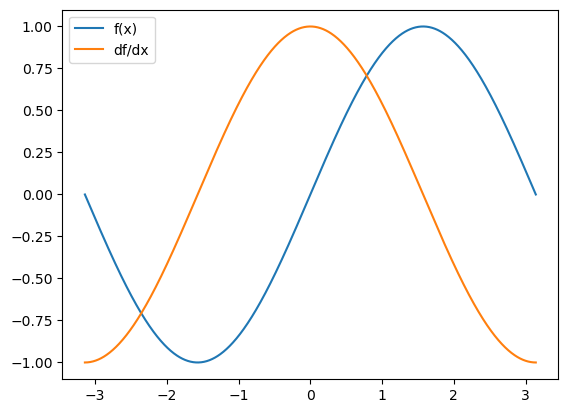

In [39]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.sin(x)
x = np.linspace(-np.pi, np.pi, 1000)
dfdx = np.gradient(f(x), x)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, dfdx, label="df/dx")
ax.legend()
plt.show()

In [40]:
import numpy as np
import sympy as sp
from scipy import optimize

# Função para calcular a retenção
def calcular_retencao(P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X1) - 0.8782 * np.log(np.divide(P, X2)) - 0.795 * np.log(np.divide(P, X3)) - 1.6731 * np.log(np.divide(P, X4)) + 0.3797 * np.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 - 0.84590 * X25 - 0.7094 * X26)
    return D / (1 + D)

# Definindo as variáveis
P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 C L target')

# Definindo a função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3)
           - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8
           - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15
           + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22
           + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26) * (P - C) - L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X1) - 0.8782 * sp.log(P / X2) - 0.795 * sp.log(P / X3)
           - 1.6731 * sp.log(P / X4) + 0.3797 * sp.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9
           + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16
           + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24
           - 0.8459 * X25 - 0.7094 * X26) - target)

# Derivando F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, C, L, target), dF_dL, 'numpy')

# Define a função de Lagrange
def func(X, indicadora, custo, target_demand):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
   
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
   
    for i in range(n):
        D_i = calcular_retencao(P[i], *indicadora[i])
        objetivo += D_i * (P[i] - custo[i])
        soma_demandas += D_i
   
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - target_demand * n)

# Aplicando as derivadas calculadas
def dfunc(X, indicadora, custo, target):
    P_vals = X[:-1]
    L_val = X[-1]
    dLambda = np.zeros(len(X))
   
    for i in range(len(P_vals)):
        dLambda[i] = dF_dP_func(P_vals[i], *indicadora[i], custo[i], L_val, target)
   
    dLambda[-1] = dF_dL_func(P_vals[0], *indicadora[0], custo[0], L_val, target)  # Usando o primeiro conjunto de indicadores para Lambda
   
    return dLambda

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais, custo, target):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
   
    # Calculando os preços otimizados
    X_otimizado = optimize.fsolve(dfunc, X_inicial, args=(indicadora, custo, target), xtol=1e-06, maxfev=500)
   
    # Retornando o vetor de preços otimizados e o multiplicador de Lagrange
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = np.random.rand(10, 26)  # Exemplo de matriz de indicadores
precos_iniciais = np.random.rand(10) * 100  # Exemplo de preços iniciais
custo = np.random.rand(10) * 50  # Exemplo de custos
target = 1000  # Exemplo de demanda média

precos_otimizados, lambida = otimizar_precos(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)


λ: -6.460823438822077
Preços Otimizados: [10.95127277 53.85389854 12.68420715 39.87471067 91.5580181   6.92340409
 91.57049805  3.62036287 67.31034509 34.26087477]


<lambdifygenerated-31>:2: RuntimeWarning: overflow encountered in exp
  return -L*(-13.7030247400932*P**(-1.2576)*(P/X2)**(-0.8782)*(P/X3)**(-0.795)*(P/X4)**(-1.6731)*(X5 + 1)**0.3797*exp(1.3647*P/X1 + 0.3919*X10 - 0.1397*X11 - 0.2305*X12 - 0.2832*X13 + 0.0024*X14 - 0.1476*X15 + 0.2817*X16 + 0.3336*X17 - 0.4115*X18 + 0.0127*X19 - 0.73*X20 + 0.4343*X21 + 1.1066*X22 + 1.9561*X23 - 0.0742*X24 - 0.8459*X25 - 0.7094*X26 + 0.0011*X6 + 0.1253*X7 + 0.1334*X8 - 0.1382*X9) + 5.18896691439975*P**(-0.2576)*(P/X2)**(-0.8782)*(P/X3)**(-0.795)*(P/X4)**(-1.6731)*(X5 + 1)**0.3797*exp(1.3647*P/X1 + 0.3919*X10 - 0.1397*X11 - 0.2305*X12 - 0.2832*X13 + 0.0024*X14 - 0.1476*X15 + 0.2817*X16 + 0.3336*X17 - 0.4115*X18 + 0.0127*X19 - 0.73*X20 + 0.4343*X21 + 1.1066*X22 + 1.9561*X23 - 0.0742*X24 - 0.8459*X25 - 0.7094*X26 + 0.0011*X6 + 0.1253*X7 + 0.1334*X8 - 0.1382*X9)/X1) - 13.7030247400932*P**(-1.2576)*(P/X2)**(-0.8782)*(P/X3)**(-0.795)*(P/X4)**(-1.6731)*(-C + P)*(X5 + 1)**0.3797*exp(1.3647*P/X1 + 0.3919*X10 - 

In [44]:
import numpy as np
import sympy as sp
from scipy import optimize


Corrige o erro


# Função para calcular a retenção
def calcular_retencao(P, X):
    D = np.exp(0.64 + 0.4 * X - 0.005 * P) 
    return D / (1 + D)

# Definindo as variáveis
P, X, C, L, target = sp.symbols('P X C L target')


# Definindo a função F
F = (sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P)) )* (P - C) -L * (sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P)) - target)

# Derivando F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, X, C, L, target), dF_dL, 'numpy')

# Define a função de Lagrange
def func(X, indicadora, custo, target_demand):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
   
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
   
    for i in range(n):
        D_i = calcular_retencao(P[i], *indicadora[i])
        objetivo += D_i * (P[i] - custo[i])
        soma_demandas += D_i
   
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - target_demand * n)

# Aplicando as derivadas calculadas
def dfunc(X, indicadora, custo, target):
    P_vals = X[:-1]
    L_val = X[-1]
    dLambda = np.zeros(len(X))
   
    for i in range(len(P_vals)):
        dLambda[i] = dF_dP_func(P_vals[i], *indicadora[i], custo[i], L_val, target)
   
    dLambda[-1] = dF_dL_func(P_vals[0], *indicadora[0], custo[0], L_val, target)  # Usando o primeiro conjunto de indicadores para Lambda
   
    return dLambda

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais, custo, target):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
   
    # Calculando os preços otimizados
    X_otimizado = optimize.fsolve(dfunc, X_inicial, args=(indicadora, custo, target), xtol=1e-06, maxfev=500)
   
    # Retornando o vetor de preços otimizados e o multiplicador de Lagrange
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = [1, 0]  # Exemplo de variáveis indicadoras para dois clientes
precos_iniciais = [400, 500]  # Exemplo de preços iniciais para dois clientes

custo = 150 # Exemplo de custos
target =  0.7450314360809431  # Exemplo de demanda média

precos_otimizados, lambida = otimizar_precos(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)

TypeError: Value after * must be an iterable, not int

In [47]:
import numpy as np
import sympy as sp
from scipy import optimize

# Função para calcular a retenção
def calcular_retencao(P, X):
    D = np.exp(0.64 + 0.4 * X - 0.005 * P) 
    return D / (1 + D)

# Definindo as variáveis
P, X, C, L, target = sp.symbols('P X C L target')

# Definindo a função F
F = (sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))) * (P - C) - L * (sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P)) - target)

# Derivando F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, X, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, X, C, L, target), dF_dL, 'numpy')

# Define a função de Lagrange
def func(X, indicadora, custo, target_demand):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
   
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
   
    for i in range(n):
        D_i = calcular_retencao(P[i], indicadora[i])
        objetivo += D_i * (P[i] - custo[i])
        soma_demandas += D_i
   
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - target * n)

# Aplicando as derivadas calculadas
def dfunc(X, indicadora, custo, target):
    P_vals = X[:-1]
    L_val = X[-1]
    dLambda = np.zeros(len(X))
   
    for i in range(len(P_vals)):
        dLambda[i] = dF_dP_func(P_vals[i], indicadora[i], custo[i], L_val, target)
   
    dLambda[-1] = dF_dL_func(P_vals[0], indicadora[0], custo[0], L_val, target)  # Usando o primeiro conjunto de indicadores para Lambda
   
    return dLambda

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais, custo, target):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
   
    # Calculando os preços otimizados
    X_otimizado = optimize.fsolve(dfunc, X_inicial, args=(indicadora, custo, target), xtol=1e-06, maxfev=500)
   
    # Retornando o vetor de preços otimizados e o multiplicador de Lagrange
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = [1, 0]  # Exemplo de variáveis indicadoras para dois clientes
precos_iniciais = [400, 500]  # Exemplo de preços iniciais para dois clientes

custo = [150, 150]  # Exemplo de custos
target = 0.3235  # Exemplo de demanda média

precos_otimizados, lambida = otimizar_precos(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)

λ: -90.09264927781805
Preços Otimizados: [355.54666426 332.01934212]


In [48]:
dF_dL   12468332/25289

target - 1.89648087930495*exp(-0.005*P + 0.4*X)/(1.89648087930495*exp(-0.005*P + 0.4*X) + 1)

In [55]:
 1.89648087930495*np.exp(-0.005*355.54666426)+0.4*1/(1.89648087930495*np.exp(-0.005*355.54666426)+0.4*1+1)

0.5530292763308577

In [56]:
 0.7450314360809431

0.7450314360809431

In [57]:
1.89648087930495*np.exp(-0.005*332.01934212)+0.4*0/(1.89648087930495*np.exp(-0.005*332.01934212)+0.4*0+1)

0.360560068506314

In [58]:
 0.7450314360809431-(0.5530292763308577+0.360560068506314)

-0.16855790875622856

In [59]:
dF_dP_func(355.54666426, 1, 150, 0, 0.7450314360809431)

0.09858287675847305

In [61]:
import numpy as np
import scipy.optimize as optimize

def calcular_retencao_vetor(P, indicadora):
    """
    Função vetorizada para calcular a retenção de demanda em lote.
    """
    termos = np.array([
        1.3356,
        -0.2576 * np.log(P),
        1.3647 * np.divide(P, indicadora[:, 0]),
        -0.8782 * np.log(np.divide(P, indicadora[:, 1])),
        -0.795 * np.log(np.divide(P, indicadora[:, 2])),
        -1.6731 * np.log(np.divide(P, indicadora[:, 3])),
        0.3797 * np.log(indicadora[:, 4] + 1),
        0.0011 * indicadora[:, 5],
        0.1253 * indicadora[:, 6],
        0.1334 * indicadora[:, 7],
        -0.1382 * indicadora[:, 8],
        0.3919 * indicadora[:, 9],
        -0.1397 * indicadora[:, 10],
        -0.2305 * indicadora[:, 11],
        -0.2832 * indicadora[:, 12],
        0.0024 * indicadora[:, 13],
        -0.1476 * indicadora[:, 14],
        0.2817 * indicadora[:, 15],
        0.3336 * indicadora[:, 16],
        -0.4115 * indicadora[:, 17],
        0.0127 * indicadora[:, 18],
        -0.73 * indicadora[:, 19],
        0.4343 * indicadora[:, 20],
        1.1066 * indicadora[:, 21],
        1.9561 * indicadora[:, 22],
        -0.0742 * indicadora[:, 23],
        -0.8459 * indicadora[:, 24],
        -0.7094 * indicadora[:, 25]
    ])
   
    D = np.exp(np.sum(termos, axis=0))
    return D / (1 + D)

def func_vetorizada(X, indicadora, custo, target_demand):
    """
    Função de Lagrange otimizada com cálculo vetorizado.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
    objetivo = np.sum(D * (P - custo))
    soma_demandas = np.sum(D)
   
    return objetivo - L * (soma_demandas - target_demand * len(P))

def dfunc_vetorizada(X, indicadora, custo, target_demand):
    """
    Derivada vetorizada da função objetivo em relação a P e L.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
   
    # Derivada parcial em relação a P
    dP = D * (1 - D) * (1.3647 / indicadora[:, 0] - 0.2576 / P
                        - 0.8782 / indicadora[:, 1] - 0.795 / indicadora[:, 2]
                        - 1.6731 / indicadora[:, 3])
   
    # Derivada parcial em relação a L
    dL = np.sum(D) - target_demand * len(P)
   
    return np.append(dP, dL)

def otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target_demand):
    """
    Função otimizada para calcular os preços.
    """
    X_inicial = np.append(precos_iniciais, 0)
   
    X_otimizado = optimize.fsolve(dfunc_vetorizada, X_inicial, args=(indicadora, custo, target_demand), xtol=1e-06, maxfev=500)
   
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = np.random.rand(10, 26)
precos_iniciais = np.random.rand(10) * 100
custo = np.random.rand(10) * 50
target = 1000

precos_otimizados, lambida = otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)



λ: 0.0
Preços Otimizados: [13.52602384 81.45991843 23.14620037 28.51313057 10.32492952 72.54570864
  3.77893931 28.16478715 70.07119237 80.13430568]


C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\819565657.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  termos = np.array([
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\819565657.py:39: RuntimeWarning: overflow encountered in exp
  D = np.exp(np.sum(termos, axis=0))
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\819565657.py:40: RuntimeWarning: invalid value encountered in divide
  return D / (1 + D)


In [62]:
indicadora

array([[0.36801928, 0.61139641, 0.73056037, 0.86625563, 0.28779568,
        0.80396668, 0.77220692, 0.35262354, 0.53983793, 0.90112473,
        0.04248995, 0.30820957, 0.8113738 , 0.98395582, 0.10503237,
        0.87098357, 0.39683114, 0.98048755, 0.95512916, 0.4835397 ,
        0.55749389, 0.25170687, 0.34120998, 0.4486904 , 0.71702572,
        0.05503264],
       [0.96463014, 0.73832006, 0.55471644, 0.18959832, 0.52045527,
        0.25576313, 0.96214778, 0.05180485, 0.98137017, 0.80015411,
        0.4800031 , 0.52595401, 0.39456752, 0.36330927, 0.8533963 ,
        0.42747304, 0.6071168 , 0.31671545, 0.76478629, 0.58406008,
        0.98291239, 0.73183632, 0.82016521, 0.35411454, 0.18603791,
        0.461184  ],
       [0.93210029, 0.18618671, 0.69442305, 0.80077977, 0.11391944,
        0.03019462, 0.63249038, 0.98281287, 0.45079279, 0.9268736 ,
        0.45992109, 0.84299613, 0.79498426, 0.55197858, 0.5297956 ,
        0.10603474, 0.77073422, 0.40369788, 0.9062407 , 0.0220021 ,
      

In [63]:
import numpy as np
import scipy.optimize as optimize

def calcular_retencao_vetor(P, indicadora):
    """
    Função vetorizada para calcular a retenção de demanda em lote.
    """
    termos = np.array([
        1.3356,
        -0.2576 * np.log(P),
        1.3647 * np.divide(P, indicadora[:, 0]),
        -0.8782 * np.log(np.divide(P, indicadora[:, 1])),
        -0.795 * np.log(np.divide(P, indicadora[:, 2])),
        -1.6731 * np.log(np.divide(P, indicadora[:, 3])),
        0.3797 * np.log(indicadora[:, 4] + 1),
        0.0011 * indicadora[:, 5],
        0.1253 * indicadora[:, 6],
        0.1334 * indicadora[:, 7],
        -0.1382 * indicadora[:, 8],
        0.3919 * indicadora[:, 9],
        -0.1397 * indicadora[:, 10],
        -0.2305 * indicadora[:, 11],
        -0.2832 * indicadora[:, 12],
        0.0024 * indicadora[:, 13],
        -0.1476 * indicadora[:, 14],
        0.2817 * indicadora[:, 15],
        0.3336 * indicadora[:, 16],
        -0.4115 * indicadora[:, 17],
        0.0127 * indicadora[:, 18],
        -0.73 * indicadora[:, 19],
        0.4343 * indicadora[:, 20],
        1.1066 * indicadora[:, 21],
        1.9561 * indicadora[:, 22],
        -0.0742 * indicadora[:, 23],
        -0.8459 * indicadora[:, 24],
        -0.7094 * indicadora[:, 25]
    ])
   
    D = np.exp(np.sum(termos, axis=0))
    return D / (1 + D)

def func_vetorizada(X, indicadora, custo, target_demand):
    """
    Função de Lagrange otimizada com cálculo vetorizado.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
    objetivo = np.sum(D * (P - custo))
    soma_demandas = np.sum(D)
   
    return objetivo - L * (soma_demandas - target_demand * len(P))

def dfunc_vetorizada(X, indicadora, custo, target_demand):
    """
    Derivada vetorizada da função objetivo em relação a P e L.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
   
    # Derivada parcial em relação a P
    dP = D * (1 - D) * (1.3647 / indicadora[:, 0] - 0.2576 / P
                        - 0.8782 / indicadora[:, 1] - 0.795 / indicadora[:, 2]
                        - 1.6731 / indicadora[:, 3])
   
    # Derivada parcial em relação a L
    dL = np.sum(D) - target_demand * len(P)
   
    return np.append(dP, dL)

def otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target_demand):
    """
    Função otimizada para calcular os preços.
    """
    X_inicial = np.append(precos_iniciais, 0)
   
    X_otimizado = optimize.fsolve(dfunc_vetorizada, X_inicial, args=(indicadora, custo, target_demand), xtol=1e-06, maxfev=500)
   
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida

# Exemplo de uso
indicadora = np.random.rand(10, 26)
precos_iniciais = np.random.rand(10) * 100
custo = np.random.rand(10) * 50
target = 1000

precos_otimizados, lambida = otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)


λ: 0.0
Preços Otimizados: [ 2.05235078  5.61919898  5.45749346 90.73732143  1.24077971 95.64899897
 94.00185321 73.16144502 11.07882181 55.24831287]


C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\2402543918.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  termos = np.array([
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\2402543918.py:10: RuntimeWarning: invalid value encountered in log
  -0.2576 * np.log(P),
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\2402543918.py:12: RuntimeWarning: invalid value encountered in log
  -0.8782 * np.log(np.divide(P, indicadora[:, 1])),
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\2402543918.py:13: RuntimeWarning: invalid value encountered in log
  -0.795 * np.log(np.divide(P, indicadora[:, 2])),
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_27764\2402543918.py:14: RuntimeWarning: invalid value encountered in log
  -1.6731 * np.log(np.divide(P, indi

In [ ]:
lista_variaveis_na_ordem = [
    'is_casco_ofer',
    'GBM_mercado',
    'Premio_IC_100',
    'premio_anterior',
    'MD_tempo_casa_2',
    'per_com',
    'per_com_bin_p_1_10',
    'canal_bin_Corretor_Mais',
    'Cod_End_bin_13509',
    'fator_ajuste_bin_f_101_120',
    'classe_bonus_bin_00',
    'UF_bin_AL_CE_RS',
    'UF_bin_AP_DF_ES_PA_PB_RN_SC',
    'UF_bin_GO_MA_MG',
    'UF_bin_MT_PR',
    'UF_bin_RJ',
    'MD_comb_bin_Gasolina',
    'md_tipo_renov_ant_bin_1_SeguroNovo',
    'md_tipo_renov_ant_bin_3_RenovCongenere',
    'fx_ir_12m_bin_01_00_20',
    'fx_ir_12m_bin_03_40_60',
    'fx_ir_12m_bin_04_60_80',
    'fx_ir_12m_bin_05_80_100',
    'MD_tipo_renov_bin_3_RenovPropria_com_sin',
    'idade_ult_RNS_bin_01_05_anos',
    'idade_ult_RNS_bin_06_inf']

indicadora=np.array(df.loc[:,lista_variaveis_na_ordem])
custo=df['Act_cost']
precos_iniciais = df['precos']
target =0.51

In [ ]:
import numpy as np
import scipy.optimize as optimize

def calcular_retencao_vetor(P, indicadora):
    """
    Função vetorizada para calcular a retenção de demanda em lote.
    """
    termos = np.array([
        1.3356,
        -0.2576 * np.log(P),
        1.3647 * np.divide(P, indicadora[:, 0]),
        -0.8782 * np.log(np.divide(P, indicadora[:, 1])),
        -0.795 * np.log(np.divide(P, indicadora[:, 2])),
        -1.6731 * np.log(np.divide(P, indicadora[:, 3])),
        0.3797 * np.log(indicadora[:, 4] + 1),
        0.0011 * indicadora[:, 5],
        0.1253 * indicadora[:, 6],
        0.1334 * indicadora[:, 7],
        -0.1382 * indicadora[:, 8],
        0.3919 * indicadora[:, 9],
        -0.1397 * indicadora[:, 10],
        -0.2305 * indicadora[:, 11],
        -0.2832 * indicadora[:, 12],
        0.0024 * indicadora[:, 13],
        -0.1476 * indicadora[:, 14],
        0.2817 * indicadora[:, 15],
        0.3336 * indicadora[:, 16],
        -0.4115 * indicadora[:, 17],
        0.0127 * indicadora[:, 18],
        -0.73 * indicadora[:, 19],
        0.4343 * indicadora[:, 20],
        1.1066 * indicadora[:, 21],
        1.9561 * indicadora[:, 22],
        -0.0742 * indicadora[:, 23],
        -0.8459 * indicadora[:, 24],
        -0.7094 * indicadora[:, 25]
    ])
   
    D = np.exp(np.sum(termos, axis=0))
    return D / (1 + D)

def func_vetorizada(X, indicadora, custo, target_demand):
    """
    Função de Lagrange otimizada com cálculo vetorizado.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
    objetivo = np.sum(D * (P - custo))
    soma_demandas = np.sum(D)
   
    return objetivo - L * (soma_demandas - target_demand * len(P))

def dfunc_vetorizada(X, indicadora, custo, target_demand):
    """
    Derivada vetorizada da função objetivo em relação a P e L.
    """
    P = X[:-1]
    L = X[-1]
   
    D = calcular_retencao_vetor(P, indicadora)
   
    # Derivada parcial em relação a P
    dP = D * (1 - D) * (1.3647 / indicadora[:, 0] - 0.2576 / P
                        - 0.8782 / indicadora[:, 1] - 0.795 / indicadora[:, 2]
                        - 1.6731 / indicadora[:, 3])
   
    # Derivada parcial em relação a L
    dL = np.sum(D) - target_demand * len(P)
   
    return np.append(dP, dL)

def otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target_demand):
    """
    Função otimizada para calcular os preços.
    """
    X_inicial = np.append(precos_iniciais, 0)
   
    X_otimizado = optimize.fsolve(dfunc_vetorizada, X_inicial, args=(indicadora, custo, target_demand), xtol=1e-06, maxfev=500)
   
    precos_otimizados = X_otimizado[:-1]
    lambida = X_otimizado[-1]
   
    return precos_otimizados, lambida



precos_otimizados, lambida = otimizar_precos_vetorizado(indicadora, precos_iniciais, custo, target)

print("λ:", lambida)
print("Preços Otimizados:", precos_otimizados)

In [ ]:
df_relatorio_otim = df.copy()


df_relatorio_otim['precos_otimizados'] = precos_otimizados

df_relatorio_otim['batente_otim']=np.round(df_relatorio_otim['precos_otimizados']/df_relatorio_otim['premio'],2)
df_relatorio_otim['batente_otim_prem_ant']=np.round(df_relatorio_otim['precos_otimizados']/df_relatorio_otim['premio_anterior'],2)



df_relatorio_otim['retencao_otimizada'] = calcular_retencao(df_relatorio_otim['precos_otimizados'],X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26)


df_relatorio_otim["per_com_pct"] = df_relatorio_otim['per_com']/100
df_relatorio_otim["premio_prob"] = df_relatorio_otim["retencao_otimizada"]*df_relatorio_otim["precos_otimizados"]
df_relatorio_otim["Act_cost_prob"] = df_relatorio_otim["retencao_otimizada"]*df_relatorio_otim["Act_cost"]                                                                
df_relatorio_otim["comissao_valor"] = df_relatorio_otim["per_com_pct"] *df_relatorio_otim["precos_otimizados"]
df_relatorio_otim["comissao_valor_prob"] = df_relatorio_otim["per_com_pct"]*df_relatorio_otim["premio_prob"]

df_relatorio_otim["premio_anterior_prob"] = df_relatorio_otim["retencao_otimizada"]*df_relatorio_otim["premio_anterior"]

comis_ofertado    = np.sum(df_relatorio_otim["comissao_valor"])/np.sum(df_relatorio_otim["precos_otimizados"])
comis_esperado    = np.sum(df_relatorio_otim["comissao_valor_prob"])/np.sum(df_relatorio_otim["premio_prob"])

premio_anterior_ofer    = np.mean(df_relatorio_otim["premio_anterior"])
premio_anterior_w   = np.sum(df_relatorio_otim["premio_anterior_prob"])/np.sum(df_relatorio_otim["retencao_otimizada"])


apolice_ofertada  = np.round(df_relatorio_otim.shape[0],0)
apolice_estimada  = np.round(np.sum(df_relatorio_otim["retencao_otimizada"]),0)
premio_ofertado   = np.mean(df_relatorio_otim["precos_otimizados"])
retencao_estimada = np.mean(df_relatorio_otim["retencao_otimizada"])
premio_esperado   = np.sum(df_relatorio_otim["premio_prob"])/np.sum(df_relatorio_otim["retencao_otimizada"])
risco_ofertado    = np.mean(df_relatorio_otim["Act_cost"])
risco_esperado    = np.sum(df_relatorio_otim["Act_cost_prob"])/np.sum(df_relatorio_otim["retencao_otimizada"])
sp_ofertado       = np.sum(df_relatorio_otim["Act_cost"])/np.sum(df_relatorio_otim["precos_otimizados"])
sp_esperado       = np.sum(df_relatorio_otim["Act_cost_prob"])/np.sum(df_relatorio_otim["premio_prob"])
comis_ofertado    = np.sum(df_relatorio_otim["comissao_valor"])/np.sum(df_relatorio_otim["precos_otimizados"])
comis_esperado    = np.sum(df_relatorio_otim["comissao_valor_prob"])/np.sum(df_relatorio_otim["premio_prob"])
ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749


print('Apolices Ofertadas: %s' % apolice_ofertada)
print('Apolices Renovadas: %s' % apolice_estimada)
print('premio_ofertado: %s' % np.round(premio_ofertado,2))
print('retencao_estimada : %s' % np.round(retencao_estimada*100,2))
print('premio_esperado" : %s'  %np.round( premio_esperado,2))
print('risco_ofertado" : %s'  %  np.round(risco_ofertado,2))
print('risco_esperado" : %s'  %  np.round(risco_esperado,2))

print('comis_ofertado" : %s'  % np.round(comis_ofertado*100,2))
print('comis_esperado" : %s'  % np.round(comis_esperado*100,2))

print('sp_ofertado" : %s'  % np.round(sp_ofertado*100,2))
print('sp_esperado" : %s'  % np.round(sp_esperado*100,2))
print('ic_ofertado" : %s'  % np.round(ic_ofertado*100,2))
print('ic_esperado" : %s'  % np.round(ic_esperado*100,2))

print('premio_anterior_ofer" : %s'  %np.round( premio_anterior_ofer,2))
print('premio_anterior_w" : %s'  %np.round( premio_anterior_w,2))

In [64]:
import numpy as np
import pandas as pd
import sympy as sp

# Gerar um DataFrame de exemplo
data = {
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.rand(10),
    'Premio_IC_100': np.random.rand(10) * 1000,
    'premio_anterior': np.random.rand(10) * 1000,
    'MD_tempo_casa_2': np.random.rand(10) * 10,
    'per_com': np.random.rand(10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10),
    'Act_cost': np.random.rand(10) * 1000,
    'premio': np.random.rand(10) * 1000
}

df = pd.DataFrame(data)

# Definir as variáveis
P = sp.symbols('P')
variables = sp.symbols('X1:X27')
C = sp.symbols('C')
L = sp.symbols('L')
target = sp.symbols('target')

# Definir a função F
F = sp.exp(
    1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / variables[0]) - 0.8782 * sp.log(P / variables[1]) - 0.795 * sp.log(P / variables[2]) - 1.6731 * sp.log(P / variables[3]) + 0.3797 * sp.log(variables[4] + 1) + 0.0011 * variables[5] + 0.1253 * variables[6] + 0.1334 * variables[7] - 0.1382 * variables[8] + 0.3919 * variables[9] - 0.1397 * variables[10] - 0.2305 * variables[11] - 0.2832 * variables[12] + 0.0024 * variables[13] - 0.1476 * variables[14] + 0.2817 * variables[15] + 0.3336 * variables[16] - 0.4115 * variables[17] + 0.0127 * variables[18] - 0.73 * variables[19] + 0.4343 * variables[20] + 1.1066 * variables[21] + 1.9561 * variables[22] - 0.0742 * variables[23] - 0.8459 * variables[24] - 0.7094 * variables[25]
) * (P - C) - L * (
    sp.exp(
        1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / variables[0]) - 0.8782 * sp.log(P / variables[1]) - 0.795 * sp.log(P / variables[2]) - 1.6731 * sp.log(P / variables[3]) + 0.3797 * sp.log(variables[4] + 1) + 0.0011 * variables[5] + 0.1253 * variables[6] + 0.1334 * variables[7] - 0.1382 * variables[8] + 0.3919 * variables[9] - 0.1397 * variables[10] - 0.2305 * variables[11] - 0.2832 * variables[12] + 0.0024 * variables[13] - 0.1476 * variables[14] + 0.2817 * variables[15] + 0.3336 * variables[16] - 0.4115 * variables[17] + 0.0127 * variables[18] - 0.73 * variables[19] + 0.4343 * variables[20] + 1.1066 * variables[21] + 1.9561 * variables[22] - 0.0742 * variables[23] - 0.8459 * variables[24] - 0.7094 * variables[25]
    ) - target
)

# Derivar F em relação a P e L
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Converter as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P, *variables, C, L, target), dF_dP, 'numpy')
dF_dL_func = sp.lambdify((P, *variables, C, L, target), dF_dL, 'numpy')

# Função de demanda para calcular a retenção com base no preço
def calcular_retencao(P, *variables):
    D = np.exp(
        1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, variables[0]) - 0.8782 * np.log(np.divide(P, variables[1])) - 0.795 * np.log(np.divide(P, variables[2])) - 1.6731 * np.log(np.divide(P, variables[3])) + 0.3797 * np.log(variables[4] + 1) + 0.0011 * variables[5] + 0.1253 * variables[6] + 0.1334 * variables[7] - 0.1382 * variables[8] + 0.3919 * variables[9] - 0.1397 * variables[10] - 0.2305 * variables[11] - 0.2832 * variables[12] + 0.0024 * variables[13] - 0.1476 * variables[14] + 0.2817 * variables[15] + 0.3336 * variables[16] - 0.4115 * variables[17] + 0.0127 * variables[18] - 0.73 * variables[19] + 0.4343 * variables[20] + 1.1066 * variables[21] + 1.9561 * variables[22] - 0.0742 * variables[23] - 0.8459 * variables[24] - 0.7094 * variables[25]
    )
    return D / (1 + D)

# Definir a função objetivo que maximiza a margem esperada otimizada
def objetivo(P):
    df['retencao_otimizada1'] = calcular_retencao(P, *variables)
    df['margem_esperada_otimizada'] = df['retencao_otimizada1'] * (df['premio'] - df['Act_cost'])
    margem_esperada_total = df['margem_esperada_otimizada'].sum()
    return -margem_esperada_total

# Exibir o DataFrame gerado
print(df)

   is_casco_ofer  GBM_mercado  Premio_IC_100  premio_anterior  \
0              0     0.475677     740.368066       993.832405   
1              1     0.275660     913.160503       513.619755   
2              1     0.602907     620.093071       318.834475   
3              0     0.850660     789.234121       866.001924   
4              1     0.454723     358.234720        22.859467   
5              1     0.762178     676.704318        44.332272   
6              0     0.068012     935.606648       277.776110   
7              0     0.017842     515.347272       978.028319   
8              0     0.456924     894.210139       287.606487   
9              1     0.864325     188.339006       124.980536   

   MD_tempo_casa_2   per_com  per_com_bin_p_1_10  canal_bin_Corretor_Mais  \
0         8.962532  0.424471                   1                        1   
1         6.899913  0.732114                   1                        1   
2         7.818761  0.477230                   1     

In [69]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Símbolos
variaveis = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 C L target')

# Função F
P, *X, C, L, target = variaveis

F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
           1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
           0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
           0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
           0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
           L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                      1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                      0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                      0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                      0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify
dF_dP_func = sp.lambdify(variaveis, dF_dP, 'numpy') 
dF_dL_func = sp.lambdify(variaveis, dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X[0]) - 0.8782 * np.log(np.divide(P, X[1])) -
               0.795 * np.log(np.divide(P, X[2])) - 1.6731 * np.log(np.divide(P, X[3])) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] -
               0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] -
               0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] + 0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] -
               0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25])
    return D / (1 + D)

# Função objetivo para otimização
def objetivo(P, *args):
    X, C, L, target = args
    df['retencao_otimizada1'] = calcular_retencao(P, *X)
    df['margem_esperada_otimizada'] = df['retencao_otimizada1'] * (P - df['Act_cost'])
    margem_esperada_total = df['margem_esperada_otimizada'].sum()
    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(df['target']) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

restr_1 = {'type': 'eq', 'fun': constr1}
restr_2 = {'type': 'eq', 'fun': constr2} 
restri = [restr_1, restr_2]

# Otimização
limites = [(df['LB'][i], df['UB'][i]) for i in range(len(df))] 
precos_iniciais = df['premio']

resultado = minimize(objetivo,
                     precos_iniciais,
                     args=(X, df['Act_cost'], L, df['target']),
                     method='L-BFGS-B',
                     tol=0.01,
                     constraints=restri,
                     bounds=limites)

precos_otimizados = resultado.x
margem_esperada_total_otimizada = -resultado.fun

print("Preços Otimizados:", precos_otimizados)
rint("Margem Esperada Total Otimizada:", margem_esperada_total_otimizada)


KeyError: 'LB'

In [ ]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Variáveis simbólicas
P = sp.Symbol('P')
X = sp.symbols('X1:X27')
C = sp.Symbol('C')
L = sp.Symbol('L')
target = sp.Symbol('target')

# Função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
           1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
           0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
           0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
           0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
           L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                      1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                      0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                      0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                      0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify para cálculos numéricos dF_dP_func = sp.lambdify((P, *X, C, L, target), dF_dP, 'numpy') dF_dL_func = sp.lambdify((P, *X, C, L, target), dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)



# Função objetivo para otimização
def objetivo(P, *args):
    X, C, L, target = args
    retencao = calcular_retencao(P, *X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = np.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(target) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

restr_1 = {'type': 'eq', 'fun': constr1}
restr_2 = {'type': 'eq', 'fun': constr2} 
restri = [restr_1, restr_2]

data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Preparação de variáveis
indicadora = np.array(df.loc[:, lista_variaveis_na_ordem]) 
custo = df['Act_cost'] 
precos_iniciais = df['premio'] 
df['target'] = 0.55

# Limites (LB e UB) para otimização
limites = np.array(df[['LB', 'UB']])

# Executando a otimização
resultado = minimize(
    objetivo,
    precos_iniciais,
    args=(indicadora, custo, df['target']),
    method='L-BFGS-B',
    tol=0.01,
    constraints=restri,
    bounds=limites
)

# Resultados
precos_otimizados = resultado.x
margem_esperada_total_otimizada = -resultado.fun

print("Preços Otimizados:", precos_otimizados) 
print("Margem Esperada Total Otimizada:", margem_esperada_total_otimizada)


In [ ]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Variáveis simbólicas
P = sp.Symbol('P')
X = sp.symbols('X1:X27')
C = sp.Symbol('C')
L = sp.Symbol('L')
target = sp.Symbol('target')

# Função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
           1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
           0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
           0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
           0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
           L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                      1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                      0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                      0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                      0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify para cálculos numéricos dF_dP_func = sp.lambdify((P, *X, C, L, target), dF_dP, 'numpy') dF_dL_func = sp.lambdify((P, *X, C, L, target), dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

# Função objetivo para otimização
def objetivo(P, *args):
    X, C, target = args
    retencao = calcular_retencao(P, *X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = np.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(target) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

restr_1 = {'type': 'eq', 'fun': lambda P, *args: constr1(P, *args), 'args': (indicadora, custo, L, df['target'])}
restr_2 = {'type': 'eq', 'fun': lambda P, *args: constr2(P, *args), 'args': (indicadora, custo, L, df['target'])}
restri = [restr_1, restr_2]

data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Preparação de variáveis
indicadora = np.array(df.loc[:, lista_variaveis_na_ordem]) 
custo = df['Act_cost'] 
precos_iniciais = df['premio'] 
df['target'] = 0.55

# Limites (LB e UB) para otimização
limites = np.array(df[['LB', 'UB']])

# Executando a otimização
resultado = minimize(
    objetivo,
    precos_iniciais,
    args=(indicadora, custo, df['target']),
    method='L-BFGS-B',
    tol=0.01,
    constraints=restri,
    bounds=limites
)

# Resultados
precos_otimizados = resultado.x
margem_esperada_total_otimizada = -resultado.fun

print("Preços Otimizados:", precos_otimizados) 
print("Margem Esperada Total Otimizada:", margem_esperada_total_otimizada)

In [ ]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Variáveis simbólicas
P = sp.Symbol('P')
X = sp.symbols('X1:X27')
C = sp.Symbol('C')
L = sp.Symbol('L')
target = sp.Symbol('target')

# Função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
          1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
          0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
          0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
          0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
          L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                 1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                 0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                 0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                 0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify para cálculos numéricos dF_dP_func = sp.lambdify((P, *X, C, L, target), dF_dP, 'numpy') dF_dL_func = sp.lambdify((P, *X, C, L, target), dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

# Função objetivo para otimização
def objetivo(P, *args):
    X, C, target = args

    # Ajuste para garantir que os arrays sejam do mesmo tamanho
    P = np.asarray(P)
    C = np.asarray(C)
    target = np.asarray(target)
    retencao = calcular_retencao(P, *X)

    # Calcular a margem esperada otimizada de forma element-wise
    margem_esperada_otimizada = retencao * (P - C)

    # Somar a margem total
    margem_esperada_total = np.sum(margem_esperada_otimizada)

    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(target) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

restr_1 = {'type': 'eq', 'fun': lambda P, *args: constr1(P, *args), 'args': (indicadora, custo, L, df['target'])}
restr_2 = {'type': 'eq', 'fun': lambda P, *args: constr2(P, *args), 'args': (indicadora, custo, L, df['target'])}
restri = [restr_1, restr_2]

data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Preparação de variáveis
indicadora = np.array(df.loc[:, lista_variaveis_na_ordem]) 
custo = df['Act_cost'] 
precos_iniciais = df['premio'] 
df['target'] = 0.55

# Limites (LB e UB) para otimização
limites = np.array(df[['LB', 'UB']])

# Executando a otimização
resultado = minimize(
    objetivo,
    precos_iniciais,
    args=(indicadora, custo, df['target']),
    method='L-BFGS-B',
    tol=0.01,
    constraints=restri,
    bounds=limites
)

# Resultados
precos_otimizados = resultado.x
margem_esperada_total_otimizada = -resultado.fun

print("Preços Otimizados:", precos_otimizados) 
print("Margem Esperada Total Otimizada:", margem_esperada_total_otimizada)

In [ ]:
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

In [70]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Variáveis simbólicas
P = sp.Symbol('P')
X = sp.symbols('X1:X27')
C = sp.Symbol('C')
L = sp.Symbol('L')
target = sp.Symbol('target')

# Função F
F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
          1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
          0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
          0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
          0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
          L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                 1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                 0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                 0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                 0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify para cálculos numéricos dF_dP_func = sp.lambdify((P, *X, C, L, target), dF_dP, 'numpy') dF_dL_func = sp.lambdify((P, *X, C, L, target), dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

# Função objetivo para otimização
def objetivo(P, *args):
    X, C, target = args

    # Ajuste para garantir que os arrays sejam do mesmo tamanho
    P = np.asarray(P)
    C = np.asarray(C)
    target = np.asarray(target)
    retencao = calcular_retencao(P, *X)

    # Calcular a margem esperada otimizada de forma element-wise
    margem_esperada_otimizada = retencao * (P - C)

    # Somar a margem total
    margem_esperada_total = np.sum(margem_esperada_otimizada)

    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(target) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

In [71]:
# Preparação de variáveis
indicadora = np.array(df.loc[:, lista_variaveis_na_ordem]) 
custo = df['Act_cost'] 
precos_iniciais = df['premio'] 
df['target'] = 0.55

NameError: name 'lista_variaveis_na_ordem' is not defined

In [ ]:
lista_variaveis_na_ordem = [
    'is_casco_ofer',
    'GBM_mercado',
    'Premio_IC_100',
    'premio_anterior',
    'MD_tempo_casa_2',
    'per_com',
    'per_com_bin_p_1_10',
    'canal_bin_Corretor_Mais',
    'Cod_End_bin_13509',
    'fator_ajuste_bin_f_101_120',
    'classe_bonus_bin_00',
    'UF_bin_AL_CE_RS',
    'UF_bin_AP_DF_ES_PA_PB_RN_SC',
    'UF_bin_GO_MA_MG',
    'UF_bin_MT_PR',
    'UF_bin_RJ',
    'MD_comb_bin_Gasolina',
    'md_tipo_renov_ant_bin_1_SeguroNovo',
    'md_tipo_renov_ant_bin_3_RenovCongenere',
    'fx_ir_12m_bin_01_00_20',
    'fx_ir_12m_bin_03_40_60',
    'fx_ir_12m_bin_04_60_80',
    'fx_ir_12m_bin_05_80_100',
    'MD_tipo_renov_bin_3_RenovPropria_com_sin',
    'idade_ult_RNS_bin_01_05_anos',
    'idade_ult_RNS_bin_06_inf']

indicadora=np.array(df.loc[:,lista_variaveis_na_ordem])
custo=df['Act_cost']
precos_iniciais = df['premio']
df['target']=0.55

In [72]:
import sympy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Símbolos
variaveis = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 C L target')

# Função F
P, *X, C, L, target = variaveis

F = sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
           1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
           0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
           0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
           0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) * (P - C) - \
           L * (sp.exp(1.3356 - 0.2576 * sp.log(P) + 1.3647 * (P / X[0]) - 0.8782 * sp.log(P / X[1]) - 0.795 * sp.log(P / X[2]) -
                      1.6731 * sp.log(P / X[3]) + 0.3797 * sp.log(X[4] + 1) + 0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] -
                      0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] -
                      0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
                      0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25]) - target)

# Derivadas
dF_dP = sp.diff(F, P)
dF_dL = sp.diff(F, L)

# Funções lambdify
dF_dP_func = sp.lambdify(variaveis, dF_dP, 'numpy') 
dF_dL_func = sp.lambdify(variaveis, dF_dL, 'numpy')

# Função para calcular a retenção
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X[0]) - 0.8782 * np.log(np.divide(P, X[1])) -
               0.795 * np.log(np.divide(P, X[2])) - 1.6731 * np.log(np.divide(P, X[3])) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] - 0.1397 * X[10] -
               0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] + 0.2817 * X[15] + 0.3336 * X[16] -
               0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] + 0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] -
               0.0742 * X[23] - 0.8459 * X[24] - 0.7094 * X[25])
    return D / (1 + D)

# Função objetivo para otimização
def objetivo(P, *args):
    X, C, L, target = args
    df['retencao_otimizada1'] = calcular_retencao(P, *X)
    df['margem_esperada_otimizada'] = df['retencao_otimizada1'] * (P - df['Act_cost'])
    margem_esperada_total = df['margem_esperada_otimizada'].sum()
    return -margem_esperada_total

# Restrições
def constr1(P, *args):
    X, C, L, target = args
    return np.sum(df['target']) - np.sum(dF_dL_func(P, *X, C, L, target))

def constr2(P, *args):
    X, C, L, target = args
    return L * np.sum(dF_dP_func(P, *X, C, L, target))

restr_1 = {'type': 'eq', 'fun': constr1}
restr_2 = {'type': 'eq', 'fun': constr2} 
restri = [restr_1, restr_2]

# Otimização
limites = [(df['LB'][i], df['UB'][i]) for i in range(len(df))] 
precos_iniciais = df['premio']

resultado = minimize(objetivo,
                     precos_iniciais,
                     args=(X, df['Act_cost'], L, df['target']),
                     method='L-BFGS-B',
                     tol=0.01,
                     constraints=restri,
                     bounds=limites)

precos_otimizados = resultado.x
margem_esperada_total_otimizada = -resultado.fun

print("Preços Otimizados:", precos_otimizados)
rint("Margem Esperada Total Otimizada:", margem_esperada_total_otimizada)

KeyError: 'LB'

In [73]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# Criar um dataframe de exemplo
data = {
    'Produto': ['A', 'B', 'C', 'D'],
    'Custo': [10, 20, 15, 25],
    'Preco': [15, 30, 25, 35],
    'Demanda': [100, 150, 200, 250]
}
df = pd.DataFrame(data)

# Calcular a margem de lucro
df['Margem'] = df['Preco'] - df['Custo']

# Definir a demanda target k
k = 180

# Definir as variáveis do problema de otimização
c = -df['Margem'].values  # Coeficientes da função objetivo (negativo para maximizar)
A_eq = [df['Demanda'].values]  # Coeficientes das restrições de igualdade
b_eq = [k]  # Limite das restrições de igualdade

# Definir os limites das variáveis (quantidade de cada produto)
bounds = [(0, None) for _ in range(len(df))]

# Resolver o problema de otimização
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Adicionar a quantidade otimizada ao dataframe
df['Quantidade'] = res.x

# Calcular a margem total
margem_total = df['Margem'].dot(df['Quantidade'])

print("Dataframe com as quantidades otimizadas:")
print(df)
print(f"\nMargem total maximizada: {margem_total}")

Dataframe com as quantidades otimizadas:
  Produto  Custo  Preco  Demanda  Margem  Quantidade
0       A     10     15      100       5         0.0
1       B     20     30      150      10         1.2
2       C     15     25      200      10         0.0
3       D     25     35      250      10         0.0

Margem total maximizada: 12.0


In [74]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Criar um dataframe de exemplo
data = {
    'Produto': ['A', 'B', 'C', 'D'],
    'Preco': [15, 30, 25, 35],
    'Custo': [10, 20, 15, 25],
    'Demanda': [100, 150, 200, 250]
}
df = pd.DataFrame(data)

# Definir a demanda target k
k = 180

# Definir os parâmetros da função logística
alpha = 0.5
beta = 0.1

# Definir a função de demanda logística
def demanda(P):
    return 1 / (1 + np.exp(-(alpha + beta * P)))

# Definir a função de custo logística
def custo(P):
    return df['Custo'] / (1 + np.exp(-(alpha + beta * P)))

# Definir a função de margem
def margem(P):
    return P - custo(P)

# Definir a função objetivo a ser maximizada (margem total)
def func_objetivo(P):
    return -np.sum(demanda(P) * margem(P))

# Definir a restrição de demanda
def restricao_demanda(P):
    return np.sum(demanda(P)) - k

# Definir os limites das variáveis (preços)
bounds = [(0, None) for _ in range(len(df))]

# Resolver o problema de otimização
resultado = minimize(func_objetivo, df['Preco'], bounds=bounds, constraints={'type': 'eq', 'fun': restricao_demanda})

# Adicionar os preços otimizados ao dataframe
df['Preco Otimizado'] = resultado.x

# Calcular a margem total otimizada
margem_total_otimizada = np.sum(demanda(df['Preco Otimizado']) * margem(df['Preco Otimizado']))

print("Dataframe com os preços otimizados:")
print(df)
print(f"\nMargem total maximizada: {margem_total_otimizada}")

Dataframe com os preços otimizados:
  Produto  Preco  Custo  Demanda  Preco Otimizado
0       A     15     10      100       133.734336
1       B     30     20      150      1476.770247
2       C     25     15      200      5705.843454
3       D     35     25      250       764.378009

Margem total maximizada: 8010.725939255108


In [75]:
demanda(df['Preco Otimizado'])

0    0.999999
1    1.000000
2    1.000000
3    1.000000
Name: Preco Otimizado, dtype: float64

In [76]:
import sympy as sp

# Definir a variável e a função
x = sp.symbols('x')
y = 4*x**3 + 2*x**2 + 1

# Passo 1: Diferenciar a função
dy_dx = sp.diff(y, x)
print(f"Primeira derivada: {dy_dx}")

# Passo 2: Encontrar os pontos críticos
pontos_criticos = sp.solve(dy_dx, x)
print(f"Pontos críticos: {pontos_criticos}")

# Passo 3: Verificar se os pontos críticos são máximos ou mínimos
d2y_dx2 = sp.diff(dy_dx, x)
print(f"Segunda derivada: {d2y_dx2}")

for ponto in pontos_criticos:
    valor_segunda_derivada = d2y_dx2.subs(x, ponto)
    if valor_segunda_derivada > 0:
        print(f"x = {ponto} é um mínimo local.")
    elif valor_segunda_derivada < 0:
        print(f"x = {ponto} é um máximo local.")
    else:
        print(f"x = {ponto} é um ponto de inflexão.")

# Passo 4: Calcular o valor de y nos pontos críticos
for ponto in pontos_criticos:
    y_valor = y.subs(x, ponto)
    print(f"Em x = {ponto}, y = {y_valor}")

Primeira derivada: 12*x**2 + 4*x
Pontos críticos: [-1/3, 0]
Segunda derivada: 24*x + 4
x = -1/3 é um máximo local.
x = 0 é um mínimo local.
Em x = -1/3, y = 29/27
Em x = 0, y = 1


In [ ]:
Explicação:
Diferenciação: A primeira derivada da função ( y = 4x^3 + 2x^2 + 1 ) é ( 12x^2 + 4x ).
Pontos Críticos: Os pontos críticos são ( x = 0 ) e ( x = -1/3 ).
Verificação: A segunda derivada ( 24x + 4 ) é usada para determinar se os pontos críticos são máximos ou mínimos. Em ( x = 0 ), a segunda derivada é positiva, indicando um mínimo local. Em ( x = -1/3 ), a segunda derivada é negativa, indicando um máximo local.
Valores de ( y ): Substituindo os pontos críticos na função original, encontramos que em ( x = -1/3 ), ( y = 29/27 ), que é o valor máximo local.

In [ ]:
Abaixo envio uma função demanda com a função de modelo logit/binomial onde retorna um probabilidade de retenção e uma função objetivo

como objetivo de maximizar a margem esperada onde F(P,X) função target é margem e G(P,X) é a função budget a restrição e K é a rentenção media.

Crie um df de exemplo e um algoritmo que maximize a margem encontrando os zeros da função objetivo de forma que as restrições sejam atendidas, 
ou seja, dado K, encontrar o P (preço) que maximize a margem.


def Demanda(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
    return np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)/(1+np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26))


def objetivo (P,,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
     return  (np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)/(1+np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)) )*(P-C)-L*(np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)/(1+np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26))-K)

        
    
    
    
    
    

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define a função de demanda
def Demanda(P, X):
    return np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25]) / (1 + np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25]))

# Define a função objetivo
def objetivo(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return -(demanda * (P - C) - L * (demanda - K))

# Cria um DataFrame de exemplo
data = {
    'X1': np.random.rand(100),
    'X2': np.random.rand(100),
    'X3': np.random.rand(100),
    'X4': np.random.rand(100),
    'X5': np.random.rand(100),
    'X6': np.random.rand(100),
    'X7': np.random.rand(100),
    'X8': np.random.rand(100),
    'X9': np.random.rand(100),
    'X10': np.random.rand(100),
    'X11': np.random.rand(100),
    'X12': np.random.rand(100),
    'X13': np.random.rand(100),
    'X14': np.random.rand(100),
    'X15': np.random.rand(100),
    'X16': np.random.rand(100),
    'X17': np.random.rand(100),
    'X18': np.random.rand(100),
    'X19': np.random.rand(100),
    'X20': np.random.rand(100),
    'X21': np.random.rand(100),
    'X22': np.random.rand(100),
    'X23': np.random.rand(100),
    'X24': np.random.rand(100),
    'X25': np.random.rand(100),
    'X26': np.random.rand(100)
}

df = pd.DataFrame(data)

# Define constantes
C = 10
K = 50

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    res = minimize(objetivo, x0=[10, 1], args=(C, K, row.values), bounds=[(1, None), (0, None)])
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results

print(df.head())

C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\1320025.py:7: RuntimeWarning: overflow encountered in exp
  return np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25]) / (1 + np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[1

         X1        X2        X3        X4        X5        X6        X7  \
0  0.073914  0.050433  0.010980  0.066693  0.742318  0.356661  0.631994   
1  0.336476  0.114320  0.000264  0.568983  0.318400  0.177229  0.437684   
2  0.892414  0.472178  0.817252  0.174103  0.524528  0.414280  0.765180   
3  0.609970  0.612021  0.271575  0.578577  0.006343  0.081774  0.204085   
4  0.052767  0.074959  0.162381  0.445982  0.258080  0.957551  0.266389   

         X8        X9       X10  ...       X18       X19       X20       X21  \
0  0.060243  0.462742  0.731274  ...  0.800944  0.524497  0.381172  0.849738   
1  0.241733  0.111757  0.030508  ...  0.812700  0.949100  0.518946  0.214927   
2  0.746974  0.396082  0.374566  ...  0.550808  0.233050  0.871254  0.883513   
3  0.595729  0.039956  0.058838  ...  0.954571  0.951943  0.840189  0.154287   
4  0.629815  0.120813  0.679311  ...  0.207777  0.313863  0.579299  0.199928   

        X22       X23       X24       X25       X26  Optimal_Price  

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import sympy as sp

# Cria o DataFrame conforme fornecido
df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150]
})

# Define a função de demanda
def demanda(X, P):
    D = np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))
    return D

# Define a função de Lagrange
def func(X, indicadora, C, K):
    P = X[:-1]  # Extraindo o vetor de preços [p1, p2, ..., pn]
    L = X[-1]   # Extraindo o multiplicador de Lagrange
    n = len(P)
    
    # Função objetivo e a soma das demandas
    objetivo = 0
    soma_demandas = 0
    
    for i in range(n):
        D_i = demanda(indicadora[i], P[i])
        objetivo += D_i * (P[i] - C[i])
        soma_demandas += D_i
    
    # Definindo a função de Lagrange com a restrição
    return objetivo - L * (soma_demandas - K)

# Aplicando a diferenciação 
# Definindo as variáveis
P_sym, X_sym, C_sym, Lambda_sym, K_sym = sp.symbols('P X C Lambda K')

# Definindo a função F usando sympy
F = (sp.exp(0.64 + 0.4 * X_sym - 0.005 * P_sym) / (1 + sp.exp(0.64 + 0.4 * X_sym - 0.005 * P_sym))) * (P_sym - C_sym) - Lambda_sym * (sp.exp(0.64 + 0.4 * X_sym - 0.005 * P_sym) / (1 + sp.exp(0.64 + 0.4 * X_sym - 0.005 * P_sym)) - K_sym)

# Derivando F em relação a P
dF_dP = sp.diff(F, P_sym)

# Derivando F em relação a Lambda
dF_dLambda = sp.diff(F, Lambda_sym)

# Convertendo as derivadas em funções utilizáveis
dF_dP_func = sp.lambdify((P_sym, X_sym, C_sym, Lambda_sym, K_sym), dF_dP, 'numpy')
dF_dLambda_func = sp.lambdify((P_sym, X_sym, C_sym, Lambda_sym, K_sym), dF_dLambda, 'numpy')

# Definindo a função para otimizar os preços
def otimizar_precos(indicadora, precos_iniciais, C, K):
    # Iniciando o vetor X com os preços iniciais e um valor inicial para o multiplicador de Lagrange
    X_inicial = np.append(precos_iniciais, 0)
    
    # Calculando os preços otimizados
    def sistema(X):
        P = X[:-1]
        Lambda = X[-1]
        eqs = []
        for i in range(len(P)):
            eqs.append(dF_dP_func(P[i], indicadora[i], C[i], Lambda, K))
        eqs.append(dF_dLambda_func(P[0], indicadora[0], C[0], Lambda, K))  # Usando o primeiro cliente para dF/dLambda
        return eqs
    
    X_otimizado = fsolve(sistema, X_inicial)
    precos_otimizados = X_otimizado[:-1]
    lambda_otimizado = X_otimizado[-1]
    return precos_otimizados, lambda_otimizado

# Exemplo de uso

K = 0.7450314360809431
indicadora = df['X'].values  # Variáveis indicadoras para os clientes
precos_iniciais = df['P'].values  # Preços iniciais para os clientes
C = df['C'].values  # Custos para os clientes

precos_otimizados, lambida_otimizada = otimizar_precos(indicadora, precos_iniciais, C, K)
print("λ:", lambida_otimizada)
print("P1:", precos_otimizados[0])
print("P2:", precos_otimizados[1])

λ: -940.8676574791722
P1: -6.457230940941637
P2: -65.250969890126


In [3]:
dF_dP_func

<function _lambdifygenerated(P, X, C, Lambda, K)>

In [4]:
dF_dLambda_func(-6.4-57230940941637, 1, 150, -940.8676574791722, 0.7450314360809431)

<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in exp
  return K - 1.89648087930495*exp(-0.005*P + 0.4*X)/(1.89648087930495*exp(-0.005*P + 0.4*X) + 1)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return K - 1.89648087930495*exp(-0.005*P + 0.4*X)/(1.89648087930495*exp(-0.005*P + 0.4*X) + 1)


nan

In [40]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

df = df_lote_otim


P=(df['premio'])
X1=np.array(df['is_casco_ofer'])
X2=np.array(df['GBM_mercado'])
X3=np.array(df['Premio_IC_100'])
X4=np.array(df['premio_anterior'])
X5=np.array(df['MD_tempo_casa_2'])
X6=np.array(df['per_com'])
X7=np.array(df['per_com_bin_p_1_10'])
X8=np.array(df['canal_bin_Corretor_Mais'])
X9=np.array(df['Cod_End_bin_13509'])
X10=np.array(df['fator_ajuste_bin_f_101_120'])
X11=np.array(df['classe_bonus_bin_00'])
X12=np.array(df['UF_bin_AL_CE_RS'])
X13=np.array(df['UF_bin_AP_DF_ES_PA_PB_RN_SC'])
X14=np.array(df['UF_bin_GO_MA_MG'])
X15=np.array(df['UF_bin_MT_PR'])
X16=np.array(df['UF_bin_RJ'])
X17=np.array(df['MD_comb_bin_Gasolina'])
X18=np.array(df['md_tipo_renov_ant_bin_1_SeguroNovo'])
X19=np.array(df['md_tipo_renov_ant_bin_3_RenovCongenere'])
X20=np.array(df['fx_ir_12m_bin_01_00_20'])
X21=np.array(df['fx_ir_12m_bin_03_40_60'])
X22=np.array(df['fx_ir_12m_bin_04_60_80'])
X23=np.array(df['fx_ir_12m_bin_05_80_100'])
X24=np.array(df['MD_tipo_renov_bin_3_RenovPropria_com_sin'])
X25=np.array(df['idade_ult_RNS_bin_01_05_anos'])
X26=np.array(df['idade_ult_RNS_bin_06_inf'])
X26=np.array(df['idade_ult_RNS_bin_06_inf'])



# Define a função de demanda
def Demanda(P, X):
    D=np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)
    return D/(1+D)


# Define a função objetivo
def objetivo(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return -(demanda * (P - C) - L * (demanda - K))

# Cria um DataFrame de exemplo

lista_variaveis_na_ordem = ['is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','X27']

X = np.array(df.loc[:, lista_variaveis_na_ordem])
P_val = df['premio']

# Definir os limites para os preços otimizado
nome_variaveis = ['LB','UB']
limites=np.array(df.loc[:,nome_variaveis])

# Define constantes
C =  df['premio']
K = 750

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    res = minimize(objetivo, x0=P_val, args=(C, K, row.values), bounds=limites)
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results

print(df.head())


NameError: name 'df_lote_otim' is not defined

In [39]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize  


df = data[['premio','is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','LB','UB','Renewal_Demand','Act_cost']]


# Define a função de demanda
def Demanda(P, X):
    D = np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25])
    return D / (1 + D)

# Define a função objetivo
def objetivo(params, C, K, X,L=100):
    P, L = params
    demanda = Demanda(P, X)
    return -np.sum((demanda * (P - C) - L * (demanda - K)) )


# Define a função objetivo
#def restricao(params, C, K, X,L):
#    P, L = params
#    demanda = Demanda(P, X)
#    return -np.sum(L * (demanda - K)) )
constraints={'type': 'eq', 'fun': restricao}

# Define constantes
C = df['Act_cost']
K = 0.525*df.shape[0]

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    X = row[1:27].values  # Exclui 'premio', 'LB' e 'UB'
    bounds = [(row['LB'], row['UB']), (0, None)]  # Limites para P e L
    res = minimize(objetivo, x0=[row['premio'], 1], args=(C, K, X), bounds=bounds)
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results



TypeError: unhashable type: 'list'

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define a função de demanda
def Demanda(P, X):
    D = np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25])
    return D / (1 + D)

# Define a função objetivo
def objetivo(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return -np.sum(demanda * (P - C))

# Define a função de restrição
def restricao(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return np.sum(L * (demanda - K))

# Cria um DataFrame de exemplo


# Define constantes
C = df['Act_cost']
K = df['Renewal_Demand'].mean()*df.shape[0]

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    X = row[1:27].values  # Exclui 'premio', 'LB' e 'UB'
    bounds = [(row['LB'], row['UB']), (0, None)]  # Limites para P e L
    constraints = {'type': 'eq', 'fun': restricao, 'args': (C[index], K[index], X)}
    
    res = minimize(objetivo, x0=[row['premio'], 1], args=(C[index], K[index], X), bounds=bounds, constraints=constraints)
    
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results

print(df.head())

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize  


    
    
# Define a função de demanda
def Demanda(P, X):
    D = np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25])
    return D / (1 + D)

# Define a função objetivo
def objetivo(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return -np.sum(demanda * (P - C) )


# Define a função objetivo
def restricao(params, C, K, X,L):
    P, L = params
    demanda = Demanda(P, X)
    return L *np.sum((demanda - K))


# Define constantes
C = df['Act_cost']
K = 0.525*df.shape[0]

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    X = row[1:27].values  # Exclui 'premio', 'LB' e 'UB'
    bounds = [(row['LB'], row['UB']), (0, None)]  # Limites para P e L
    res = minimize(objetivo, x0=[row['premio'], 1], args=(C, K, X), bounds=bounds,constraints={'type': 'eq', 'fun': restricao})
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results


In [38]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

df = data[['premio','is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','LB','UB','Renewal_Demand','Act_cost']]

# Define constantes
C = df['Act_cost']

df = df.drop[['premio','LB','UB','Renewal_Demand','Act_cost']]

# Define a função de demanda
def Demanda(P, X):
    D = np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X[0])-0.8782 * np.log(np.divide(P, X[1]))-0.795 * np.log(np.divide(P, X[2]))-1.6731 * np.log((np.divide(P, X[3])))  + 0.3797 * np.log(X[4] + 1)  + 0.0011 * X[5]  + 0.1253 * X[6]  + 0.1334 * X[7]-0.1382 * X[8]  + 0.3919 * X[9]-0.1397 * X[10]-0.2305 * X[11]-0.2832 * X[12]  + 0.0024 * X[13]-0.1476 * X[14]  + 0.2817 * X[15]  + 0.3336 * X[16]-0.4115 * X[17]  + 0.0127 * X[18]-0.73 * X[19]  + 0.4343 * X[20]  + 1.1066 * X[21]  + 1.9561 * X[22]-0.0742 * X[23] -0.84590*X[24]- 0.7094 * X[25])
    return D / (1 + D)

# Define a função objetivo
def objetivo(params, C, K, X):
    P, L = params
    demanda = Demanda(P, X)
    return -np.sum(demanda * (P - C))

# Define a função de restrição
def restricao(params, C, K, X,L=2):
    P, L = params
    demanda = Demanda(P, X)
    return  -L* np.sum((demanda - K))



K = 0.525 * df.shape[0]

# Otimiza para cada linha do DataFrame
results = []
for index, row in df.iterrows():
    X = row[1:27].values  # Exclui 'premio', 'LB' e 'UB'
    bounds = [(row['LB'], row['UB']), (0, None)]  # Limites para P e L
    constraints = {'type': 'eq', 'fun': restricao, 'args': (C[index], K, X)}
    
    res = minimize(objetivo, x0=[row['premio'], 1], args=(C[index], K, X), bounds=bounds, constraints=constraints)
    
    results.append(res.x[0])  # Armazena apenas o preço ótimo

df['Optimal_Price'] = results

df['retencao_otimizada'] = calcular_retencao(df['Optimal_Price'],X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26)


#df[['Renewal_Demand','retencao_otimizada','Optimal_Price','premio']]


TypeError: unhashable type: 'list'

In [7]:
def objective(X):
    x, y, z = X
    return x**2 + y**2 + z**2

def eq(X):
    x, y, z = X
    return 2 * x - y + z - 3

sol = minimize(objective, [1, -0.5, 0.5], constraints={'type': 'eq', 'fun': eq})
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.5
       x: [ 1.000e+00 -5.000e-01  5.000e-01]
     nit: 1
     jac: [ 2.000e+00 -1.000e+00  1.000e+00]
    nfev: 4
    njev: 1

In [8]:
from scipy.optimize import fsolve
import autograd.numpy as np
from autograd import grad


def F(L):
    'Augmented Lagrange function'
    x, y, z, _lambda = L
    return objective([x, y, z]) - _lambda * eq([x, y, z])

# Gradients of the Lagrange function
dfdL = grad(F, 0)

# Find L that returns all zeros in this function.
def obj(L):
    x, y, z, _lambda = L
    dFdx, dFdy, dFdz, dFdlam = dfdL(L)
    return [dFdx, dFdy, dFdz, eq([x, y, z])]

from scipy.optimize import fsolve
x, y, z, _lam = fsolve(obj, [0.0, 0.0, 0.0, 1.0])
print(f'The answer is at {x, y, z}')

The answer is at (1.0, -0.5, 0.5)


In [10]:
corrige o codigo abaixo, execute-o apresente os resultados e expande o exemplo para 2000 registros.


import autograd.numpy as np
from autograd import grad


df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150],
    'D': [ 0.44769, 0.29734] 
})

X_val = df['X']  # Exemplo de variáveis indicadoras para dois clientes
P_inicial = df['P']*1.35  # Exemplo de preços iniciais para dois clientes
lambda_val = np.zeros(len(X_val))

K = df['D'].mean()*df.shape[0]

# Define a função de demanda
def demanda(P,X):
    # X é uma variável indicadora (X=1/0)
    D = np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))
    return D

def F(L):
    'Augmented Lagrange function'
    P,C,K, _lambda = L
    return sp.sum(sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))) * (P - C) - _Lambda * (sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P)) - K)

# Gradients of the Lagrange function
dfdL = grad(F, 0)

# Find L that returns all zeros in this function.
def obj(L):
    P,C,K, _lambda = L
    dFdP, dFdlam  = dfdL(L)
    return [dFdP, dFdlam, ([(sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P)) - K)])]



precos_otimizados, _lambda = fsolve(obj, [P_inicial,X_val, lambda_val])

ValueError: too many values to unpack (expected 4)

In [11]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import fsolve
import pandas as pd

# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 2000),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})

X_val = df['X']
P_inicial = df['P'] * 1.35
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(L):
    P, C, K, _lambda = L
    return np.sum(demanda(P, X_val) * (P - C)) - _lambda * (np.sum(demanda(P, X_val)) - K)

# Gradientes da função de Lagrange
dfdL = grad(F)

# Encontrar L que retorna todos os zeros nesta função.
def obj(L):
    P, C, K, _lambda = L
    dFdL = dfdL(L)
    return [dFdL[0], dFdL[1], dFdL[2], dFdL[3]]

initial_guess = [P_inicial, df['C'], K, lambda_val]
result = fsolve(obj, initial_guess)

precos_otimizados = result[0]
_lambda = result[3]

print("Preços Otimizados:", precos_otimizados)
print("Lambda:", _lambda)

C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:225: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = asarray(x0).flatten()


TypeError: Can't differentiate w.r.t. type <class 'pandas.core.series.Series'>

In [13]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import fsolve
import pandas as pd

# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 2000),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(L):
    P, C, K, _lambda = L
    return np.sum(demanda(P, X_val) * (P - C)) - _lambda * (np.sum(demanda(P, X_val)) - K)

# Gradientes da função de Lagrange
dfdL = grad(F)

# Encontrar L que retorna todos os zeros nesta função.
def obj(L):
    P, C, K, _lambda = L
    dFdL = dfdL(L)
    return [dFdL[0], dFdL[1], dFdL[2], dFdL[3]]

initial_guess = [P_inicial, C_val, K, lambda_val]
result = fsolve(obj, initial_guess)

precos_otimizados = result[0]
_lambda = result[3]

print("Preços Otimizados:", precos_otimizados)
print("Lambda:", _lambda)


C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:225: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = asarray(x0).flatten()


TypeError: Grad only applies to real scalar-output functions. Try jacobian, elementwise_grad or holomorphic_grad.

In [14]:
import autograd.numpy as np
from autograd import jacobian
from scipy.optimize import fsolve
import pandas as pd

# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 2000),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(L):
    P, C, K, _lambda = L
    return np.sum(demanda(P, X_val) * (P - C)) - _lambda * (np.sum(demanda(P, X_val)) - K)

# Gradientes da função de Lagrange
dfdL = jacobian(F)

# Encontrar L que retorna todos os zeros nesta função.
def obj(L):
    P, C, K, _lambda = L
    dFdL = dfdL(L)
    return [dFdL[0], dFdL[1], dFdL[2], dFdL[3]]

initial_guess = [P_inicial, C_val, K, lambda_val]
result = fsolve(obj, initial_guess)

precos_otimizados = result[0]
_lambda = result[3]

print("Preços Otimizados:", precos_otimizados)
print("Lambda:", _lambda)


C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:225: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = asarray(x0).flatten()


ValueError: array is not broadcastable to correct shape

In [15]:
import autograd.numpy as np
from autograd import jacobian
from scipy.optimize import fsolve
import pandas as pd

# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 2000),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - lambda_val * (np.sum(demanda(P, X_val)) - K)

# Gradientes da função de Lagrange
dfdP = jacobian(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)


TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'obj'.Shape should be (2000,) but it is (2000, 2000).

In [16]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import fsolve
import pandas as pd

# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 2000),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - lambda_val * (np.sum(demanda(P, X_val)) - K)

# Gradientes da função de Lagrange
dfdP = grad(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)


TypeError: Grad only applies to real scalar-output functions. Try jacobian, elementwise_grad or holomorphic_grad.

In [18]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import fsolve
import pandas as pd



df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150],
    'D': [ 0.44769, 0.29734] 
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - np.sum(lambda_val * (demanda(P, X_val) - K / len(X_val)))

# Gradientes da função de Lagrange
dfdP = grad(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)

Preços Otimizados: [419.47373108 401.060649  ]


In [ ]:
# Gerar um DataFrame com 2000 registros
np.random.seed(0)
df = pd.DataFrame({
    'X': np.random.randint(0, 2, 100),
    'P': np.random.uniform(200, 400, 2000),
    'C': np.random.uniform(100, 200, 2000),
    'D': np.random.uniform(0.2, 0.5, 2000)
})


In [22]:
import autograd.numpy as np
from autograd import grad
from scipy.optimize import fsolve
import pandas as pd


df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150],
    'D': [ 0.44769, 0.29734] 
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - np.sum(lambda_val * (demanda(P, X_val) - K))

# Gradientes da função de Lagrange
dfdP = grad(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)




Preços Otimizados: [419.47373108 401.060649  ]


In [23]:
demanda(419.47373108,1)

0.2578126291071549

In [24]:
demanda(401.060649,0)

0.20337973782050844

In [25]:
demanda(419.47373108,1)+demanda(401.060649,0)

0.46119236692766336

In [26]:
df['X'][0]

1

In [27]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from autograd import grad

df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150],
    'D': [0.44769, 0.29734]
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - np.sum(lambda_val * (demanda(P, X_val) - K))

# Gradientes da função de Lagrange
dfdP = grad(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)


P_test = 419
print(demanda(P_test, df['X'][0]))  # Demanda para X=1
print(demanda(P_test, df['X'][1]))  # Demanda para X=0


demanda_1 = demanda(419, df['X'][0])
demanda_2 = demanda(419, df['X'][1])
resultado = demanda_1 + demanda_2
print(f"Resultado esperado: 0.74503, Resultado obtido: {resultado}")



TypeError: loop of ufunc does not support argument 0 of type ArrayBox which has no callable exp method

In [28]:
import autograd.numpy as np  # Substitua o NumPy pelo autograd.numpy
import pandas as pd
from scipy.optimize import fsolve
from autograd import grad

df = pd.DataFrame({
    'X': [1, 0],
    'P': [250, 300],
    'C': [150, 150],
    'D': [0.44769, 0.29734]
})

X_val = df['X'].values  # Converter para array do NumPy
P_inicial = df['P'].values * 1.35  # Converter para array do NumPy
C_val = df['C'].values  # Converter para array do NumPy
lambda_val = np.zeros(len(X_val))

K = df['D'].mean() * df.shape[0]

# Define a função de demanda
def demanda(P, X):
    return np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))

def F(P):
    return np.sum(demanda(P, X_val) * (P - C_val)) - np.sum(lambda_val * (demanda(P, X_val) - K))

# Gradientes da função de Lagrange
dfdP = grad(F)

# Encontrar P que retorna todos os zeros nesta função.
def obj(P):
    return dfdP(P)

initial_guess = P_inicial
precos_otimizados = fsolve(obj, initial_guess)

print("Preços Otimizados:", precos_otimizados)

# Teste de Demanda
demanda_1 = demanda(419, df['X'][0])
demanda_2 = demanda(419, df['X'][1])
resultado = demanda_1 + demanda_2
print(f"Resultado esperado: 0.74503, Resultado obtido: {resultado}")

Preços Otimizados: [419.47373108 401.060649  ]
Resultado esperado: 0.74503, Resultado obtido: 0.44749937370806314


In [ ]:
df = pd.DataFrame({
    'X': [1, 0],
    'P_base': [250, 300],
    'C': [150, 150],
    'D_base': [0.44769, 0.29734]
})


K = df['D_base'].sum() = 0.7450314360809431 , onde K é Demanda alvo


#função de demanda
def demanda(P, X):
    D=np.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + np.exp(0.64 + 0.4 * X - 0.005 * P))
    return D

D[i]= np.exp(0.64 + 0.4 * Xi - 0.005 * Pi) / (1 + np.exp(0.64 + 0.4 * Xi - 0.005 * Pi))



aplicando otimização com restrição temos 
F = (((sp.exp(1.04)*sp.exp(-0.005*p1))/(1+sp.exp(1.04)*sp.exp(-0.005*p1)))*(p1-150)+((sp.exp(0.64)*sp.exp(-0.005*p2))/(1+sp.exp(0.64)*sp.exp(-0.005*p2)))*(p2-150))-L*((((sp.exp(1.04)*sp.exp(-0.005*p1))/(1+sp.exp(1.04)*sp.exp(-0.005*p1)))+((sp.exp(0.64)*sp.exp(-0.005*p2))/(1+sp.exp(0.64)*sp.exp(-0.005*p2))))-K)


dFdL =  sp.exp(1.04) * sp.exp(- 0.005 * P1) / (1 + sp.exp(1.04) * sp.exp(- 0.005 * P1)) + sp.exp(0.64)  * sp.exp(- 0.005 * P2) / (1 + sp.exp(0.64)  * sp.exp(- 0.005 * P2)) - K = 0

dFdP1 = (sp.exp(1.04) * sp.exp(- 0.005 * P1)- 0.005 * P1)+(L+150)*0.005 = 0
dFdP2 = (sp.exp(0.64) * sp.exp(- 0.005 * P2)- 0.005 * P2)+(L+150)*0.005 = 0


Resolvendo as equações o artigo apresentou os seguintes resultados:
L: -196.73901963513433
P1: 287.5960434220056
P2: 257.7833159899672  
    
Aplicando P1 e P2 na função demanda obtenção a demanda igual a demanda alvo (K). Quando K e aumentado ou reduzido o algortmo do 
artigo encontra os Ps com que atinge a demanada alvo estipulada.

Crie um algoritmo que replique o conceito e metodologia para obetr os resultados similares ao artigo.
    

In [32]:
import sympy as sp
import pandas as pd

df = pd.DataFrame({
    'X': [1, 0],
    'P_base': [250, 300],
    'C': [150, 150],
    'D_base': [0.44769, 0.29734]
})

# Definindo as variáveis simbólicas
P1, P2, L = sp.symbols('P1 P2 L')

# Definindo a demanda alvo (K)
K = 0.7450314360809431

# Definindo a função de demanda
def demanda(P, X):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Definindo a função objetivo com restrição
F = (((sp.exp(1.04) * sp.exp(-0.005 * P1)) / (1 + sp.exp(1.04) * sp.exp(-0.005 * P1))) * (P1 - 150) +
     ((sp.exp(0.64) * sp.exp(-0.005 * P2)) / (1 + sp.exp(0.64) * sp.exp(-0.005 * P2))) * (P2 - 150)) - \
    L * ((((sp.exp(1.04) * sp.exp(-0.005 * P1)) / (1 + sp.exp(1.04) * sp.exp(-0.005 * P1))) +
          ((sp.exp(0.64) * sp.exp(-0.005 * P2)) / (1 + sp.exp(0.64) * sp.exp(-0.005 * P2)))) - K)

# Derivadas parciais da função objetivo em relação a L, P1 e P2
dFdL = sp.diff(F, L)
dFdP1 = sp.diff(F, P1)
dFdP2 = sp.diff(F, P2)

# Resolvendo o sistema de equações
sol = sp.solve([dFdL, dFdP1, dFdP2], (L, P1, P2))

# Resultados
L_val = sol[L]
P1_val = sol[P1]
P2_val = sol[P2]

print(f"L: {L_val}")
print(f"P1: {P1_val}")
print(f"P2: {P2_val}")

# Verificando a demanda com os preços otimizados
demanda_1 = demanda(P1_val, 1)
demanda_2 = demanda(P2_val, 0)
demanda_total = demanda_1 + demanda_2

print(f"Demanda total: {demanda_total}")
print(f"Demanda alvo (K): {K}")

KeyboardInterrupt: 

In [34]:
import sympy as sp

P1=400
P2=500


# Variáveis simbólicas
P1, P2, L = sp.symbols('P1 P2 L')

# Constantes do problema
K = 0.7450314360809431  # Demanda alvo
C = 150  # Custo fixo

# Função de demanda para dois produtos
def demanda(P, X):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Demanda de acordo com X
D1 = demanda(P1, 1)  # Para X=1
D2 = demanda(P2, 0)  # Para X=0

# Função objetivo (lucro com restrição de demanda)
F = (D1 * (P1 - C) + D2 * (P2 - C)) - L * ((D1 + D2) - K)

# Derivadas parciais (gradiente)
dFdL = sp.diff(F, L)
dFdP1 = sp.diff(F, P1)
dFdP2 = sp.diff(F, P2)

# Resolver o sistema de equações
sol = sp.solve([dFdL, dFdP1, dFdP2], (P1, P2, L))

# Extrair soluções
P1_sol = sol[P1]
P2_sol = sol[P2]
L_sol = sol[L]

P1_sol, P2_sol, L_sol


KeyboardInterrupt: 

In [ ]:
Com base nas informações abaixo e P_base no df temos uma D_base e a soma de D_base é  0.7450314360809431. Crie um algoritmo que 

estipula um D_alvo exempo 0.65 encontre P_otimo limitado a  0.9*P_base<=P_otimo<=P_base*1.1

df = pd.DataFrame({
    'X': [1, 0],
    'P_base': [250, 300],
    'C': [150, 150],
    'D_base': [0.44769, 0.29734]
})


# Definindo a função de demanda
def demanda(P, X):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))


In [36]:
import sympy as sp
import pandas as pd
from scipy.optimize import minimize

# Dados fornecidos
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Definindo a função de demanda
def demanda(P, X):
    return sp.exp(0.64 + 0.4 * X - 0.005 * P) / (1 + sp.exp(0.64 + 0.4 * X - 0.005 * P))

# Função objetivo para minimizar a diferença entre a demanda total e a demanda alvo
def objetivo(P, X_val, D_alvo):
    demanda_total = sum([demanda(P[i], X_val[i]) for i in range(len(P))])
    return (demanda_total - D_alvo)**4

# Definindo a demanda alvo
D_alvo = 0.65

# Valores iniciais para P
P_inicial = df['P_base'].values

# Limites para P
limites = [(0.9 * p, 1.1 * p) for p in P_inicial]

# Convertendo a função de demanda para ser compatível com o otimizador
def demanda_np(P, X):
    return sp.lambdify((sp.symbols('P')), demanda(sp.symbols('P'), X))(P)

# Função objetivo compatível com o otimizador
def objetivo_np(P):
    return objetivo(P, df['X'].values, D_alvo)

# Otimização para encontrar P_otimo
resultado = minimize(objetivo_np, P_inicial, bounds=limites)

# Resultados
P_otimo = resultado.x

print(f"P_otimo: {P_otimo}")

# Verificando a demanda com os preços otimizados
demanda_1 = demanda_np(P_otimo[0], df['X'][0])
demanda_2 = demanda_np(P_otimo[1], df['X'][1])
demanda_total = demanda_1 + demanda_2

print(f"Demanda total: {demanda_total}")
print(f"Demanda alvo (D_alvo): {D_alvo}")

P_otimo: [250. 300.]
Demanda total: 0.7450314360809431
Demanda alvo (D_alvo): 0.65


In [ ]:
def calcular_retencao(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

In [ ]:
adapte para este exemplo com df e função demanda diferente.


import sympy as sp
import pandas as pd
from scipy.optimize import minimize

# Dados fornecidos
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Definindo a função de demanda

def demanda(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])/(1+ np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25]))
    return D 

# Função objetivo para minimizar a diferença entre a demanda total e a demanda alvo
def objetivo(P, X_val, D_alvo):
    demanda_total = sum([demanda(P[i], X_val[i]) for i in range(len(P))])
    return (demanda_total - D_alvo)**4

# Definindo a demanda alvo
D_alvo = 0.65

# Valores iniciais para P
P_inicial = df['P_base'].values

# Limites para P
limites = [(0.9 * p, 1.1 * p) for p in P_inicial]

# Convertendo a função de demanda para ser compatível com o otimizador
def demanda_np(P, X):
    return sp.lambdify((sp.symbols('P')), demanda(sp.symbols('P'), X))(P)

# Função objetivo compatível com o otimizador
def objetivo_np(P):
    return objetivo(P, df['X'].values, D_alvo)

# Otimização para encontrar P_otimo
resultado = minimize(objetivo_np, P_inicial, bounds=limites)

# Resultados
P_otimo = resultado.x

print(f"P_otimo: {P_otimo}")

# Verificando a demanda com os preços otimizados
demanda_1 = demanda_np(P_otimo[0], df['X'][0])
demanda_2 = demanda_np(P_otimo[1], df['X'][1])
demanda_total = demanda_1 + demanda_2

print(f"Demanda total: {demanda_total}")
print(f"Demanda alvo (D_alvo): {D_alvo}")

In [41]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Dados fornecidos
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10)
}

df = pd.DataFrame(data)

# Definindo a função de demanda
def demanda(P, *X):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25]) / (1 + np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
               0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25]))
    return D 

# Função objetivo para minimizar a diferença entre a demanda total e a demanda alvo
def objetivo(P, X_val, D_alvo):
    demanda_total = sum([demanda(P[i], *X_val[i]) for i in range(len(P))])
    return (demanda_total - D_alvo)**2

# Definindo a demanda alvo
D_alvo = 0.65

# Valores iniciais para P
P_inicial = df['premio'].values

# Limites para P
limites = [(0.9 * p, 1.1 * p) for p in P_inicial]

# Função objetivo compatível com o otimizador
def objetivo_np(P):
    X_val = df.drop(columns=['premio']).values
    return objetivo(P, X_val, D_alvo)

# Otimização para encontrar P_otimo
resultado = minimize(objetivo_np, P_inicial, bounds=limites)

# Resultados
P_otimo = resultado.x

print(f"P_otimo: {P_otimo}")

# Verificando a demanda com os preços otimizados
X_val = df.drop(columns=['premio']).values
demanda_total = sum([demanda(P_otimo[i], *X_val[i]) for i in range(len(P_otimo))])

print(f"Demanda total: {demanda_total}")
print(f"Demanda alvo (D_alvo): {D_alvo}")

P_otimo: [251.05876808 313.62382499 219.84590151 258.27548788 280.90382546
 227.22834579 229.66550447 236.80113226 311.41946699 341.52363589]
Demanda total: 4.999999994286274
Demanda alvo (D_alvo): 0.65


C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\2930091114.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\2930091114.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\2930091114.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\2930091114.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]) + 0.3797 * np.log(X[4] + 1) +
C:\Users\flcoelho\AppData\Local\Temp\ipykernel_13208\2930091114.py:44: RuntimeWarning: divide by zero encountered in double_scalars


In [42]:
import pandas as pd

# Dados fornecidos
data = {
    'Demanda': [0.6, 0.5, 0.8, 0.7, 0.3],
    'Preco': [1000, 1100, 800, 700, 2000],
    'Elasticidade': [-1.01, -1.51, -1.81, -2.01, -3.05],
    'Custo': [600, 500, 100, 300, 800]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo

# Função para calcular a receita
def calcular_receita(preco, demanda):
    return preco * demanda

# Função para calcular a margem de lucro
def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total

# Função para ajustar o preço usando elasticidade
def ajustar_preco(preco, elasticidade):
    # Ajuste de preço baseado na elasticidade
    novo_preco = preco * (1 + 1 / elasticidade)
    return novo_preco

# Função para maximizar a margem usando elasticidade
def maximizar_margem(df):
    df['Novo_Preco'] = df.apply(lambda row: ajustar_preco(row['Preco'], row['Elasticidade']), axis=1)
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    
    # Ordenar por Margem de Lucro
    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

# Maximizar a margem
df_maximizada = maximizar_margem(df)

print(df_maximizada)

   Demanda  Preco  Elasticidade  Custo   Novo_Preco  Nova_Demanda      Margem  \
2      0.8    800         -1.81    100   358.011050      3.428707  258.011050   
3      0.7    700         -2.01    300   351.741294      2.791490   51.741294   
4      0.3   2000         -3.05    800  1344.262295      1.007828  544.262295   
1      0.5   1100         -1.51    500   371.523179      2.575101 -128.476821   
0      0.6   1000         -1.01    600     9.900990     63.462304 -590.099010   

       Receita  Margem_Lucro  
2  1227.514849   1127.514849  
3   981.882479    681.882479  
4  1354.785394    554.785394  
1   956.709624    456.709624  
0   628.339648     28.339648  


In [43]:
import pandas as pd

# Dados fornecidos
data = {
    'Demanda': [0.6, 0.5, 0.8, 0.7, 0.3],
    'Preco': [1000, 1100, 800, 700, 2000],
    'Elasticidade': [-1.01, -1.51, -1.81, -2.01, -3.05],
    'Custo': [600, 500, 100, 300, 800]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo

# Função para calcular a receita
def calcular_receita(preco, demanda):
    return preco * demanda

# Função para calcular a margem de lucro
def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total

# Função para ajustar o preço usando elasticidade
def ajustar_preco(custo, elasticidade):
    # Ajuste de preço baseado na elasticidade
    novo_preco = custo / (1 + 1 / elasticidade)
    return novo_preco

# Função para maximizar a margem usando elasticidade
def maximizar_margem(df):
    df['Novo_Preco'] = df.apply(lambda row: ajustar_preco(row['Custo'], row['Elasticidade']), axis=1)
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    
    # Ordenar por Margem de Lucro
    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

# Maximizar a margem
df_maximizada = maximizar_margem(df)

print(df_maximizada)

   Demanda  Preco  Elasticidade  Custo    Novo_Preco  Nova_Demanda  \
2      0.8    800         -1.81    100    223.456790      8.047158   
4      0.3   2000         -3.05    800   1190.243902      1.460740   
3      0.7    700         -2.01    300    597.029703      0.963814   
0      0.6   1000         -1.01    600  60600.000000      0.009503   
1      0.5   1100         -1.51    500   1480.392157      0.319304   

         Margem      Receita  Margem_Lucro  
2    123.456790  1798.192091   1698.192091  
4    390.243902  1738.637380    938.637380  
3    297.029703   575.425631    275.425631  
0  60000.000000   575.872744    -24.127256  
1    980.392157   472.694777    -27.305223  


In [44]:
import pandas as pd

# Dados fornecidos
data = {
    'Demanda': [0.6, 0.5, 0.8, 0.7, 0.3],
    'Preco': [1000, 1100, 800, 700, 2000],
    'Elasticidade': [-1.01, -1.51, -1.81, -2.01, -3.05],
    'Custo': [600, 500, 100, 300, 800]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo

# Função para calcular a receita
def calcular_receita(preco, demanda):
    return preco * demanda

# Função para calcular a margem de lucro
def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total

# Função para ajustar o preço usando elasticidade
def ajustar_preco(custo, elasticidade):
    # Ajuste de preço baseado na elasticidade
    novo_preco = custo / (1 + 1 / elasticidade)
    return novo_preco

# Função para calcular a retenção baseada na elasticidade e no preço ajustado
def calcular_retencao(elasticidade, preco_inicial, novo_preco):
    # A retenção é inversamente proporcional à mudança de preço ajustada pela elasticidade
    retencao = 50 + (preco_inicial - novo_preco) / preco_inicial * abs(elasticidade) * 100
    return min(max(retencao, 0), 100)  # Limitar a retenção entre 0% e 100%

# Função para maximizar a margem e ajustar a retenção
def maximizar_margem_e_retencao(df, meta_retencao=55):
    df['Novo_Preco'] = df.apply(lambda row: ajustar_preco(row['Custo'], row['Elasticidade']), axis=1)
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
    # Ajustar preços para atingir a meta de retenção
    while df['Retencao'].mean() < meta_retencao:
        df['Novo_Preco'] *= 0.99  # Reduzir o preço em 1%
        df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
        df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
        df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
        df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
        df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
    # Ordenar por Margem de Lucro
    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

# Maximizar a margem e ajustar a retenção
df_maximizada = maximizar_margem_e_retencao(df)

print(df_maximizada)

   Demanda  Preco  Elasticidade  Custo    Novo_Preco  Nova_Demanda  \
2      0.8    800         -1.81    100    223.456790      8.047158   
4      0.3   2000         -3.05    800   1190.243902      1.460740   
3      0.7    700         -2.01    300    597.029703      0.963814   
0      0.6   1000         -1.01    600  60600.000000      0.009503   
1      0.5   1100         -1.51    500   1480.392157      0.319304   

         Margem      Receita  Margem_Lucro    Retencao  
2    123.456790  1798.192091   1698.192091  100.000000  
4    390.243902  1738.637380    938.637380  100.000000  
3    297.029703   575.425631    275.425631   79.567185  
0  60000.000000   575.872744    -24.127256    0.000000  
1    980.392157   472.694777    -27.305223    0.000000  


In [46]:
np.mean(df_maximizada)

C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Demanda             0.580000
Preco            1120.000000
Elasticidade       -1.878000
Custo             460.000000
Novo_Preco      12818.224510
Nova_Demanda        2.160104
Margem          12358.224510
Receita          1032.164525
Margem_Lucro      572.164525
Retencao           55.913437
dtype: float64

In [48]:
import pandas as pd
from scipy.optimize import minimize

# Dados fornecidos
data = {
    'Demanda': [0.6, 0.5, 0.8, 0.7, 0.3],
    'Preco': [1000, 1100, 800, 700, 2000],
    'Elasticidade': [-1.01, -1.51, -1.81, -2.01, -3.05],
    'Custo': [600, 500, 100, 300, 800]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo

# Função para calcular a receita
def calcular_receita(preco, demanda):
    return preco * demanda

# Função para calcular a margem de lucro
def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total

# Função para calcular a retenção baseada na elasticidade e no preço ajustado
def calcular_retencao(elasticidade, preco_inicial, novo_preco):
    # A retenção é inversamente proporcional à mudança de preço ajustada pela elasticidade
    retencao = 50 + (preco_inicial - novo_preco) / preco_inicial * abs(elasticidade) * 100
    return min(max(retencao, 0), 100)  # Limitar a retenção entre 0% e 100%

# Função objetivo para maximizar a margem de lucro e ajustar a retenção
def func_objetivo(precos_ajustados, df):
    df['Novo_Preco'] = precos_ajustados
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
    # Penalizar se a retenção média for menor que a meta de retenção
    meta_retencao = 55
    penalidade_retencao = max(0, meta_retencao - df['Retencao'].mean()) * 1000
    
    # Maximizar a margem de lucro total menos a penalidade de retenção
    return -df['Margem_Lucro'].sum() + penalidade_retencao

# Função para maximizar a margem e ajustar a retenção com restrições de preço mínimo/máximo
def maximizar_margem_e_retencao_com_restricoes(df):
    precos_iniciais = df['Preco'].values
    custos = df['Custo'].values
    
    # Definir limites de preço mínimo e máximo
    limites_preco = [(custo * 1.1, preco * 1.5) for custo, preco in zip(custos, precos_iniciais)]
    
    # Otimização usando minimize com restrições de preço mínimo/máximo
    resultado = minimize(func_objetivo, precos_iniciais, args=(df,), bounds=limites_preco)
    
    # Atualizar DataFrame com os preços otimizados
    df['Novo_Preco'] = resultado.x
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
    # Ordenar por Margem de Lucro
    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

# Maximizar a margem e ajustar a retenção com restrições de preço mínimo/máximo
df_maximizada = maximizar_margem_e_retencao_com_restricoes(df)

print(df_maximizada)

   Demanda  Preco  Elasticidade  Custo  Novo_Preco  Nova_Demanda  Margem  \
2      0.8    800         -1.81    100       110.0     29.024323    10.0   
4      0.3   2000         -3.05    800       880.0      3.669362    80.0   
3      0.7    700         -2.01    300       330.0      3.173453    30.0   
1      0.5   1100         -1.51    500       550.0      1.424050    50.0   
0      0.6   1000         -1.01    600       660.0      0.912876    60.0   

       Receita  Margem_Lucro  Retencao  
2  3192.675565   3092.675565    100.00  
4  3229.038801   2429.038801    100.00  
3  1047.239516    747.239516    100.00  
1   783.227608    283.227608    100.00  
0   602.498279      2.498279     84.34  


In [54]:
adapte o codigo com variaveis de interesse conforme o df abaixo e função de demanda abaixo

Premio_inicial=(df['premio'])
X1=np.array(df['is_casco_ofer'])
X2=np.array(df['GBM_mercado'])
X3=np.array(df['Premio_IC_100'])
X4=np.array(df['premio_anterior'])
X5=np.array(df['MD_tempo_casa_2'])
X6=np.array(df['per_com'])
X7=np.array(df['per_com_bin_p_1_10'])
X8=np.array(df['canal_bin_Corretor_Mais'])
X9=np.array(df['Cod_End_bin_13509'])
X10=np.array(df['fator_ajuste_bin_f_101_120'])
X11=np.array(df['classe_bonus_bin_00'])
X12=np.array(df['UF_bin_AL_CE_RS'])
X13=np.array(df['UF_bin_AP_DF_ES_PA_PB_RN_SC'])
X14=np.array(df['UF_bin_GO_MA_MG'])
X15=np.array(df['UF_bin_MT_PR'])
X16=np.array(df['UF_bin_RJ'])
X17=np.array(df['MD_comb_bin_Gasolina'])
X18=np.array(df['md_tipo_renov_ant_bin_1_SeguroNovo'])
X19=np.array(df['md_tipo_renov_ant_bin_3_RenovCongenere'])
X20=np.array(df['fx_ir_12m_bin_01_00_20'])
X21=np.array(df['fx_ir_12m_bin_03_40_60'])
X22=np.array(df['fx_ir_12m_bin_04_60_80'])
X23=np.array(df['fx_ir_12m_bin_05_80_100'])
X24=np.array(df['MD_tipo_renov_bin_3_RenovPropria_com_sin'])
X25=np.array(df['idade_ult_RNS_bin_01_05_anos'])
X26=np.array(df['idade_ult_RNS_bin_06_inf'])
X26=np.array(df['idade_ult_RNS_bin_06_inf'])  
    
Custo=df['Act_cost']
    
def demanda(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
    D=np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)
    return D/(1+D)

  
    
# função objetivo 
def objetivo(P):
    df['precos']= P 
#Calcular a retenção 
    df['Demana'] = demanda(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26)

# Calcular a margem esperada 
    df['margem_esperada_otimizada'] =   df['retencao_otimizada1']*(df['precos'] - df['Act_cost'])
    margem_esperada_total = df['margem_esperada_otimizada'].sum() 
    return -margem_esperada_total

SyntaxError: invalid syntax (2742731980.py, line 1)

In [56]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Dados fornecidos
data = {
    'Preco': [1000, 1100, 800, 700, 2000],
    'is_casco_ofer': [1, 0, 1, 0, 1],
    'GBM_mercado': [0.5, 0.6, 0.7, 0.8, 0.9],
    'Premio_IC_100': [900, 950, 850, 800, 1950],
    'premio_anterior': [950, 1050, 750, 650, 1900],
    'MD_tempo_casa_2': [2, 3, 4, 5, 6],
    'per_com': [0.1, 0.2, 0.3, 0.4, 0.5],
    'per_com_bin_p_1_10': [1, 1, 0, 0, 1],
    'canal_bin_Corretor_Mais': [1, 0, 1, 0, 1],
    'Cod_End_bin_13509': [0, 1, 0, 1, 0],
    'fator_ajuste_bin_f_101_120': [1, 0, 1, 0, 1],
    'classe_bonus_bin_00': [0, 1, 0, 1, 0],
    'UF_bin_AL_CE_RS': [1, 0, 1, 0, 1],
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': [0, 1, 0, 1, 0],
    'UF_bin_GO_MA_MG': [1, 0, 1, 0, 1],
    'UF_bin_MT_PR': [0, 1, 0, 1, 0],
    'UF_bin_RJ': [1, 0, 1, 0, 1],
    'MD_comb_bin_Gasolina': [0.5, 0.6, 0.7, 0.8, 0.9],
    'md_tipo_renov_ant_bin_1_SeguroNovo': [1, 0, 1, 0, 1],
    'md_tipo_renov_ant_bin_3_RenovCongenere': [0.5, 0.6, 0.7, 0.8, 0.9],
    'fx_ir_12m_bin_01_00_20': [1.2, 1.3, 1.4, 1.5, 1.6],
    'fx_ir_12m_bin_03_40_60': [2.2, 2.3, 2.4, 2.5, 2.6],
    'fx_ir_12m_bin_04_60_80': [3.2, 3.3, 3.4, 3.5, 3.6],
    'fx_ir_12m_bin_05_80_100': [4.2, 4.3, 4.4, 4.5, 4.6],
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': [5, 5, 5, 5, 5],
    'idade_ult_RNS_bin_01_05_anos': [6, 6, 6, 6, 6],
    'idade_ult_RNS_bin_06_inf': [7, 7, 7, 7, 7],
    'Custo': [600, 500, 100, 300, 800]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função de demanda
def demanda(P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X1) - 0.8782 * np.log(np.divide(P, X2)) - 0.795 * np.log(np.divide(P, X3)) - 1.6731 * np.log(np.divide(P, X4)) + 0.3797 * np.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26)
    return D / (1 + D)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo

# Função para calcular a receita
def calcular_receita(preco, demanda):
    return preco * demanda

# Função para calcular a margem de lucro
def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total

# Função para calcular a retenção baseada na elasticidade e no preço ajustado
def calcular_retencao(elasticidade, preco_inicial, novo_preco):
    # A retenção é inversamente proporcional à mudança de preço ajustada pela elasticidade
    retencao = 50 + (preco_inicial - novo_preco) / preco_inicial * abs(elasticidade) * 100
    return min(max(retencao, 0), 100)  # Limitar a retenção entre 0% e 100%

# Função objetivo para maximizar a margem de lucro e ajustar a retenção
def func_objetivo(precos_ajustados):
    df['Novo_Preco'] = precos_ajustados
    df['Nova_Demanda'] = demanda(df['Novo_Preco'], df['is_casco_ofer'], df['GBM_mercado'], df['Premio_IC_100'], df['premio_anterior'], df['MD_tempo_casa_2'], df['per_com'], df['per_com_bin_p_1_10'], df['canal_bin_Corretor_Mais'], df['Cod_End_bin_13509'], df['fator_ajuste_bin_f_101_120'], df['classe_bonus_bin_00'], df['UF_bin_AL_CE_RS'], df['UF_bin_AP_DF_ES_PA_PB_RN_SC'], df['UF_bin_GO_MA_MG'], df['UF_bin_MT_PR'], df['UF_bin_RJ'], df['MD_comb_bin_Gasolina'], df['md_tipo_renov_ant_bin_1_SeguroNovo'], df['md_tipo_renov_ant_bin_3_RenovCongenere'], df['fx_ir_12m_bin_01_00_20'], df['fx_ir_12m_bin_03_40_60'], df['fx_ir_12m_bin_04_60_80'], df['fx_ir_12m_bin_05_80_100'], df['MD_tipo_renov_bin_3_RenovPropria_com_sin'], df['idade_ult_RNS_bin_01_05_anos'], df['idade_ult_RNS_bin_06_inf'])
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
    # Penalizar se a retenção média for menor que a meta de retenção
    meta_retencao = 52
    penalidade_retencao = max(0, meta_retencao - df['Retencao'].mean()) * 1000
    
    # Maximizar a margem de lucro total menos a penalidade de retenção
    return -df['Margem_Lucro'].sum() + penalidade_retencao

# Função para maximizar a margem e ajustar a retenção com restrições de preço mínimo/máximo
def maximizar_margem_e_retencao_com_restricoes(df):
    precos_iniciais = df['Preco'].values
    custos = df['Custo'].values
    
    # Definir limites de preço mínimo e máximo
    limites_preco = [(preco * 1.1, preco * 1.5) for preco in zip(precos_iniciais)]
    
    # Otimização usando minimize com restrições de preço mínimo/máximo
    resultado = minimize(func_objetivo, precos_iniciais, args=(df,), bounds=limites_preco)
    
    # Atualizar DataFrame com os preços otimizados
    df['Novo_Preco'] = resultado.x
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['preco'], row['Novo_Preco']), axis=1)
    
    # Ordenar por Margem de Lucro
    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

# Maximizar a margem e ajustar a retenção com restrições de preço mínimo/máximo
df_maximizada = maximizar_margem_e_retencao_com_restricoes(df)

print(df_maximizada)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
avalie o erro do algoritimo abaixo

data = {
    'Preco': [1000, 1100, 800, 700, 2000],
    'is_casco_ofer': [1, 0, 1, 0, 1],
    'GBM_mercado': [0.5, 0.6, 0.7, 0.8, 0.9],
    'Premio_IC_100': [900, 950, 850, 800, 1950],
    'premio_anterior': [950, 1050, 750, 650, 1900],
    'MD_tempo_casa_2': [2, 3, 4, 5, 6],
    'per_com': [0.1, 0.2, 0.3, 0.4, 0.5],
    'per_com_bin_p_1_10': [1, 1, 0, 0, 1],
    'canal_bin_Corretor_Mais': [1, 0, 1, 0, 1],
    'Cod_End_bin_13509': [0, 1, 0, 1, 0],
    'fator_ajuste_bin_f_101_120': [1, 0, 1, 0, 1],
    'classe_bonus_bin_00': [0, 1, 0, 1, 0],
    'UF_bin_AL_CE_RS': [1, 0, 1, 0, 1],
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': [0, 1, 0, 1, 0],
    'UF_bin_GO_MA_MG': [1, 0, 1, 0, 1],
    'UF_bin_MT_PR': [0, 1, 0, 1, 0],
    'UF_bin_RJ': [1, 0, 1, 0, 1],
    'MD_comb_bin_Gasolina': [0.5, 0.6, 0.7, 0.8, 0.9],
    'md_tipo_renov_ant_bin_1_SeguroNovo': [1, 0, 1, 0, 1],
    'md_tipo_renov_ant_bin_3_RenovCongenere': [0.5, 0.6, 0.7, 0.8, 0.9],
    'fx_ir_12m_bin_01_00_20': [1.2, 1.3, 1.4, 1.5, 1.6],
    'fx_ir_12m_bin_03_40_60': [2.2, 2.3, 2.4, 2.5, 2.6],
    'fx_ir_12m_bin_04_60_80': [3.2, 3.3, 3.4, 3.5, 3.6],
    'fx_ir_12m_bin_05_80_100': [4.2, 4.3, 4.4, 4.5, 4.6],
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': [5, 5, 5, 5, 5],
    'idade_ult_RNS_bin_01_05_anos': [6, 6, 6, 6, 6],
    'idade_ult_RNS_bin_06_inf': [7, 7, 7, 7, 7],
    'Custo': [600, 500, 100, 300, 800]
}


df = pd.DataFrame(data)


def demanda(P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X1) - 0.8782 * np.log(np.divide(P, X2)) - 0.795 * np.log(np.divide(P, X3)) - 1.6731 * np.log(np.divide(P, X4)) + 0.3797 * np.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26)
    return D / (1 + D)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo


def calcular_receita(preco, demanda):
    return preco * demanda


def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total


def calcular_retencao(elasticidade, preco_inicial, novo_preco):
    
    retencao = 50 + (preco_inicial - novo_preco) / preco_inicial * abs(elasticidade) * 100
    return min(max(retencao, 0), 100)  # Limitar a retenção entre 0% e 100%


def func_objetivo(precos_ajustados):
    df['Novo_Preco'] = precos_ajustados
    df['Nova_Demanda'] = demanda(df['Novo_Preco'], df['is_casco_ofer'], df['GBM_mercado'], df['Premio_IC_100'], df['premio_anterior'], df['MD_tempo_casa_2'], df['per_com'], df['per_com_bin_p_1_10'], df['canal_bin_Corretor_Mais'], df['Cod_End_bin_13509'], df['fator_ajuste_bin_f_101_120'], df['classe_bonus_bin_00'], df['UF_bin_AL_CE_RS'], df['UF_bin_AP_DF_ES_PA_PB_RN_SC'], df['UF_bin_GO_MA_MG'], df['UF_bin_MT_PR'], df['UF_bin_RJ'], df['MD_comb_bin_Gasolina'], df['md_tipo_renov_ant_bin_1_SeguroNovo'], df['md_tipo_renov_ant_bin_3_RenovCongenere'], df['fx_ir_12m_bin_01_00_20'], df['fx_ir_12m_bin_03_40_60'], df['fx_ir_12m_bin_04_60_80'], df['fx_ir_12m_bin_05_80_100'], df['MD_tipo_renov_bin_3_RenovPropria_com_sin'], df['idade_ult_RNS_bin_01_05_anos'], df['idade_ult_RNS_bin_06_inf'])
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
   
    meta_retencao = 52
    penalidade_retencao = max(0, meta_retencao - df['Retencao'].mean()) * 1000
    
   
    return -df['Margem_Lucro'].sum() + penalidade_retencao


def maximizar_margem_e_retencao_com_restricoes(df):
    precos_iniciais = df['Preco'].values
    custos = df['Custo'].values
    
   
    limites_preco = [(preco * 1.1, preco * 1.5) for preco in zip(precos_iniciais)]
    
   
    resultado = minimize(func_objetivo, precos_iniciais, args=(df,), bounds=limites_preco)
    
  
    

    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return resultado

In [ ]:
avalie o erro do algoritimo abaixo

data = {
    'Preco': [1000, 1100, 800, 700, 2000],
    'is_casco_ofer': [1, 0, 1, 0, 1],
    'GBM_mercado': [0.5, 0.6, 0.7, 0.8, 0.9],
    'Premio_IC_100': [900, 950, 850, 800, 1950],
    'premio_anterior': [950, 1050, 750, 650, 1900],
    'MD_tempo_casa_2': [2, 3, 4, 5, 6],
    'per_com': [0.1, 0.2, 0.3, 0.4, 0.5],
    'per_com_bin_p_1_10': [1, 1, 0, 0, 1],
    'canal_bin_Corretor_Mais': [1, 0, 1, 0, 1],
    'Cod_End_bin_13509': [0, 1, 0, 1, 0],
    'fator_ajuste_bin_f_101_120': [1, 0, 1, 0, 1],
    'classe_bonus_bin_00': [0, 1, 0, 1, 0],
    'UF_bin_AL_CE_RS': [1, 0, 1, 0, 1],
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': [0, 1, 0, 1, 0],
    'UF_bin_GO_MA_MG': [1, 0, 1, 0, 1],
    'UF_bin_MT_PR': [0, 1, 0, 1, 0],
    'UF_bin_RJ': [1, 0, 1, 0, 1],
    'MD_comb_bin_Gasolina': [0.5, 0.6, 0.7, 0.8, 0.9],
    'md_tipo_renov_ant_bin_1_SeguroNovo': [1, 0, 1, 0, 1],
    'md_tipo_renov_ant_bin_3_RenovCongenere': [0.5, 0.6, 0.7, 0.8, 0.9],
    'fx_ir_12m_bin_01_00_20': [1.2, 1.3, 1.4, 1.5, 1.6],
    'fx_ir_12m_bin_03_40_60': [2.2, 2.3, 2.4, 2.5, 2.6],
    'fx_ir_12m_bin_04_60_80': [3.2, 3.3, 3.4, 3.5, 3.6],
    'fx_ir_12m_bin_05_80_100': [4.2, 4.3, 4.4, 4.5, 4.6],
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': [5, 5, 5, 5, 5],
    'idade_ult_RNS_bin_01_05_anos': [6, 6, 6, 6, 6],
    'idade_ult_RNS_bin_06_inf': [7, 7, 7, 7, 7],
    'Custo': [600, 500, 100, 300, 800]
}


df = pd.DataFrame(data)


def demanda(P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26):
    D = np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * np.divide(P, X1) - 0.8782 * np.log(np.divide(P, X2)) - 0.795 * np.log(np.divide(P, X3)) - 1.6731 * np.log(np.divide(P, X4)) + 0.3797 * np.log(X5 + 1) + 0.0011 * X6 + 0.1253 * X7 + 0.1334 * X8 - 0.1382 * X9 + 0.3919 * X10 - 0.1397 * X11 - 0.2305 * X12 - 0.2832 * X13 + 0.0024 * X14 - 0.1476 * X15 + 0.2817 * X16 + 0.3336 * X17 - 0.4115 * X18 + 0.0127 * X19 - 0.73 * X20 + 0.4343 * X21 + 1.1066 * X22 + 1.9561 * X23 - 0.0742 * X24 - 0.8459 * X25 - 0.7094 * X26)
    return D / (1 + D)

# Função para calcular a margem
def calcular_margem(preco, custo):
    return preco - custo


def calcular_receita(preco, demanda):
    return preco * demanda


def calcular_margem_lucro(receita, custo_total):
    return receita - custo_total


def calcular_retencao(elasticidade, preco_inicial, novo_preco):
    
    retencao = 50 + (preco_inicial - novo_preco) / preco_inicial * abs(elasticidade) * 100
    return min(max(retencao, 0), 100)  # Limitar a retenção entre 0% e 100%


def func_objetivo(precos_ajustados):
    df['Novo_Preco'] = precos_ajustados
    df['Nova_Demanda'] = demanda(df['Novo_Preco'], df['is_casco_ofer'], df['GBM_mercado'], df['Premio_IC_100'], df['premio_anterior'], df['MD_tempo_casa_2'], df['per_com'], df['per_com_bin_p_1_10'], df['canal_bin_Corretor_Mais'], df['Cod_End_bin_13509'], df['fator_ajuste_bin_f_101_120'], df['classe_bonus_bin_00'], df['UF_bin_AL_CE_RS'], df['UF_bin_AP_DF_ES_PA_PB_RN_SC'], df['UF_bin_GO_MA_MG'], df['UF_bin_MT_PR'], df['UF_bin_RJ'], df['MD_comb_bin_Gasolina'], df['md_tipo_renov_ant_bin_1_SeguroNovo'], df['md_tipo_renov_ant_bin_3_RenovCongenere'], df['fx_ir_12m_bin_01_00_20'], df['fx_ir_12m_bin_03_40_60'], df['fx_ir_12m_bin_04_60_80'], df['fx_ir_12m_bin_05_80_100'], df['MD_tipo_renov_bin_3_RenovPropria_com_sin'], df['idade_ult_RNS_bin_01_05_anos'], df['idade_ult_RNS_bin_06_inf'])
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['Preco'], row['Novo_Preco']), axis=1)
    
   
    meta_retencao = 52
    penalidade_retencao = max(0, meta_retencao - df['Retencao'].mean()) * 1000
    
   
    return -df['Margem_Lucro'].sum() + penalidade_retencao


def maximizar_margem_e_retencao_com_restricoes(df):
    precos_iniciais = df['Preco'].values
    custos = df['Custo'].values
    
   
    limites_preco = [(preco * 1.1, preco * 1.5) for preco in zip(precos_iniciais)]
    
   
    resultado = minimize(func_objetivo, precos_iniciais, args=(df,), bounds=limites_preco)
    
  
    df['Novo_Preco'] = resultado.x
    df['Nova_Demanda'] = df.apply(lambda row: row['Demanda'] * (row['Novo_Preco'] / row['Preco']) ** row['Elasticidade'], axis=1)
    df['Margem'] = df.apply(lambda row: calcular_margem(row['Novo_Preco'], row['Custo']), axis=1)
    df['Receita'] = df.apply(lambda row: calcular_receita(row['Novo_Preco'], row['Nova_Demanda']), axis=1)
    df['Margem_Lucro'] = df.apply(lambda row: calcular_margem_lucro(row['Receita'], row['Custo']), axis=1)
    df['Retencao'] = df.apply(lambda row: calcular_retencao(row['Elasticidade'], row['preco'], row['Novo_Preco']), axis=1)
    

    df = df.sort_values(by='Margem_Lucro', ascending=False)
    
    return df

In [1]:
import numpy as np

def categorizar_em_percentis(dados, num_bins=10):
    # Ordena os dados
    dados_ordenados = np.sort(dados)
    
    # Calcula os limites dos bins
    limites = np.linspace(0, len(dados_ordenados), num_bins + 1).astype(int)
    
    # Cria os bins
    bins = [dados_ordenados[limites[i]:limites[i+1]] for i in range(num_bins)]
    
    return bins

# Exemplo de uso
dados = np.random.rand(100)  # Gera 100 números aleatórios entre 0 e 1
bins = categorizar_em_percentis(dados, num_bins=10)

for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {bin}")

Bin 1: [0.03761527 0.0440697  0.04716772 0.05040595 0.0519186  0.05304966
 0.06580712 0.07742023 0.09173623 0.09595006]
Bin 2: [0.1011203  0.11488122 0.12373215 0.12799696 0.13265416 0.13313087
 0.14146135 0.15072982 0.16745412 0.17214623]
Bin 3: [0.17256741 0.17277071 0.18223424 0.21124265 0.22051186 0.22088905
 0.23082417 0.23721778 0.2398771  0.24737152]
Bin 4: [0.26441221 0.27756058 0.27925258 0.29199661 0.29998976 0.32983439
 0.37055547 0.37701892 0.38350495 0.3899843 ]
Bin 5: [0.39929042 0.43363225 0.43596394 0.44027315 0.51031112 0.51586026
 0.51842095 0.51979205 0.53754064 0.54658069]
Bin 6: [0.55098589 0.55172662 0.55285924 0.55697058 0.56516918 0.57297567
 0.57572069 0.57790556 0.58233031 0.58368138]
Bin 7: [0.59063139 0.59285645 0.62022894 0.63889177 0.64875451 0.66135951
 0.66687524 0.66741959 0.67239242 0.67344348]
Bin 8: [0.68641446 0.6935831  0.69365233 0.69966113 0.70200207 0.72790387
 0.7296767  0.74547698 0.78908966 0.79712264]
Bin 9: [0.80884894 0.82462878 0.82540541

In [2]:
import numpy as np
import pandas as pd

def categorizar_em_percentis(df, num_bins=10):
    # Ordena o DataFrame pelo score
    df = df.sort_values(by='score').reset_index(drop=True)
    
    # Calcula o total de exposure
    total_exposure = df['exposure'].sum()
    
    # Calcula o peso de exposure por bin
    exposure_por_bin = total_exposure / num_bins
    
    bins = []
    bin_exposure = 0
    bin_scores = []
    
    for i, row in df.iterrows():
        bin_exposure += row['exposure']
        bin_scores.append(row['score'])
        
        if bin_exposure >= exposure_por_bin:
            bins.append(bin_scores)
            bin_exposure = 0
            bin_scores = []
    
    # Adiciona o último bin se não estiver vazio
    if bin_scores:
        bins.append(bin_scores)
    
    return bins

# Exemplo de uso
data = {
    'exposure': np.random.rand(100),
    'score': np.random.randint(1, 1001, 100),
    'idade': np.random.randint(18, 70, 100)
}

df = pd.DataFrame(data)
bins = categorizar_em_percentis(df, num_bins=10)

for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {bin}")

Bin 1: [5.0, 14.0, 24.0, 36.0, 50.0, 55.0, 60.0, 62.0, 91.0, 95.0]
Bin 2: [110.0, 113.0, 128.0, 133.0, 139.0, 149.0, 155.0, 157.0]
Bin 3: [159.0, 171.0, 185.0, 197.0, 202.0, 207.0, 208.0, 216.0, 225.0, 229.0]
Bin 4: [242.0, 247.0, 259.0, 286.0, 300.0, 307.0, 330.0, 331.0, 339.0, 355.0, 356.0]
Bin 5: [364.0, 366.0, 384.0, 391.0, 402.0, 409.0, 413.0, 418.0, 434.0]
Bin 6: [440.0, 445.0, 445.0, 483.0, 503.0, 508.0, 518.0, 526.0, 534.0]
Bin 7: [544.0, 559.0, 565.0, 587.0, 589.0, 604.0, 625.0, 633.0, 633.0, 643.0, 647.0, 661.0, 687.0]
Bin 8: [695.0, 708.0, 724.0, 738.0, 741.0, 751.0, 756.0, 757.0, 816.0, 822.0, 826.0, 859.0, 875.0]
Bin 9: [879.0, 885.0, 888.0, 897.0, 900.0, 901.0, 904.0, 916.0, 920.0, 920.0, 921.0, 931.0, 956.0, 959.0]
Bin 10: [968.0, 975.0, 994.0]


In [9]:
import numpy as np
import pandas as pd

def categorizar_em_percentis(df, num_bins=10):
    # Ordena o DataFrame pelo score
    df = df.sort_values(by='score').reset_index(drop=True)
    
    # Calcula o total de exposure
    total_exposure = df['exposure'].sum()
    
    # Calcula o peso de exposure por bin
    exposure_por_bin = total_exposure / num_bins
    
    bins = []
    bin_exposure = 0
    bin_scores = []
    bin_labels = []
    current_bin = 1
    
    for i, row in df.iterrows():
        bin_exposure += row['exposure']
        bin_scores.append(row['score'])
        bin_labels.append(current_bin)
        
        if bin_exposure >= exposure_por_bin:
            bins.append(bin_scores)
            bin_exposure = 0
            bin_scores = []
            current_bin += 1
    
    # Adiciona o último bin se não estiver vazio
    if bin_scores:
        bins.append(bin_scores)
        bin_labels.extend([current_bin] * len(bin_scores))
    
    # Adiciona a coluna de bins ao DataFrame original
    df['bin'] = bin_labels[:len(df)]
    
    return df, bins

# Exemplo de uso
data = {
    'exposure': np.random.rand(100),
    'score': np.random.randint(1, 1001, 100),
    'idade': np.random.randint(18, 70, 100)
}

df = pd.DataFrame(data)
df_binarizado, bins = categorizar_em_percentis(df, num_bins=10)

print(df_binarizado.head())
for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {bin}")

   exposure  score  idade  bin
0  0.350469      6     30    1
1  0.228105      8     65    1
2  0.789908     11     28    1
3  0.185307     16     64    1
4  0.317271     21     62    1
Bin 1: [6.0, 8.0, 11.0, 16.0, 21.0, 35.0, 40.0, 55.0, 60.0, 66.0]
Bin 2: [74.0, 91.0, 159.0, 171.0, 172.0, 176.0, 180.0, 189.0, 206.0, 207.0]
Bin 3: [208.0, 216.0, 225.0, 263.0, 266.0, 267.0, 271.0, 286.0, 291.0, 313.0]
Bin 4: [315.0, 321.0, 330.0, 350.0, 356.0, 362.0, 366.0, 369.0, 378.0, 379.0, 382.0]
Bin 5: [385.0, 390.0, 414.0, 419.0, 435.0, 439.0, 474.0, 486.0, 491.0, 491.0]
Bin 6: [494.0, 506.0, 508.0, 513.0, 515.0, 522.0, 538.0, 599.0, 618.0, 621.0, 623.0]
Bin 7: [638.0, 643.0, 651.0, 652.0, 662.0, 677.0, 679.0, 680.0, 685.0, 686.0]
Bin 8: [701.0, 708.0, 729.0, 729.0, 741.0, 749.0, 766.0, 771.0, 782.0, 797.0, 812.0]
Bin 9: [817.0, 822.0, 831.0, 835.0, 841.0, 841.0, 886.0, 888.0, 921.0, 923.0, 934.0]
Bin 10: [949.0, 971.0, 984.0, 991.0, 993.0, 996.0]


In [10]:
df_binarizado

,exposure,score,idade,bin
0,0.350469,6,30,1
1,0.228105,8,65,1
2,0.789908,11,28,1
3,0.185307,16,64,1
4,0.317271,21,62,1
...,...,...,...,...
95,0.691171,971,40,10
96,0.929967,984,61,10
97,0.858305,991,23,10
98,0.075889,993,27,10


In [12]:
df_binarizado.groupby('bin')['exposure'].sum()

bin
1     5.272591
2     4.990427
3     5.061909
4     5.165401
5     4.939007
6     5.509120
7     4.853850
8     5.077854
9     4.922692
10    2.667640
Name: exposure, dtype: float64

In [14]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10)
}

df = pd.DataFrame(data)

def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

target = 0.55
df['target'] = target

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constrains(m, P, X, target):
    return m.sum(target) - m.sum(calcular_retencao(m, P, X))

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)
    X = df.drop(columns=['LB', 'UB', 'target']).values.T
    C = df['Act_cost'].values
    target = df['target'].values
    
    m.Obj(objetivo(m, P, X, C))
    m.Equation(constrains(m, P, X, target) == 0)
    
    m.options.SOLVER = 1
    m.solve(disp=False)
    
    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

print(df)

TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [15]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10)
}

df = pd.DataFrame(data)

def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

target = 0.55
df['target'] = target

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constrains(m, P, X, target):
    return m.sum(target) - m.sum(calcular_retencao(m, P, X))

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)
    X = [m.Param(value=df[col].values) for col in df.columns if col not in ['LB', 'UB', 'target']]
    C = m.Param(value=df['Act_cost'].values)
    target = m.Param(value=df['target'].values)
    
    m.Obj(objetivo(m, P, X, C))
    m.Equation(constrains(m, P, X, target) == 0)
    
    m.options.SOLVER = 1
    m.solve(disp=False)
    
    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

print(df)

TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [16]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

target = 0.55
df['target'] = target

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constrains(m, P, X, target):
    return m.sum(target) - m.sum(calcular_retencao(m, P, X))

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)
    X = [m.Param(value=df[col].values) for col in df.columns if col not in ['LB', 'UB', 'target']]
    C = m.Param(value=df['Act_cost'].values)
    target = m.Param(value=df['target'].values)

    m.Obj(objetivo(m, P, X, C))
    m.Equation(constrains(m, P, X, target) == 0)

    m.options.SOLVER = 1
    m.solve(disp=False)

    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

print(df)


TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [17]:
import numpy as np
import pandas as pd
from gekko import GEKKO

erro apresentado : x must be a python list of GEKKO parameters, variables, or expressions
# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10) }

df = pd.DataFrame(data)

# Função para calcular a retenção
def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constraints(m, P, X, target):
    return m.sum(calcular_retencao(m, P, X)) - m.sum(target)

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)

    # Variáveis de decisão
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)

    # Parâmetros
    X = [m.Array(m.Param, len(df), value=df[col].values) for col in df.columns if col not in ['LB', 'UB', 'target', 'Act_cost']]
    C = m.Param(value=df['Act_cost'].values)
    target = m.Param(value=df['premio'].values)  # Corrigido para usar 'premio' como target

    # Definir função objetivo
    m.Obj(objetivo(m, P, X, C))

    # Definir restrições
    m.Equation(constraints(m, P, X, target) == 0)

    # Configuração do solver
    m.options.SOLVER = 1

    # Executar a otimização
    m.solve(disp=True)

    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

# Exibir resultados
print(df)


TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [18]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10)
}

df = pd.DataFrame(data)

def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

target = 0.55
df['target'] = target

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constraints(m, P, X, target):
    return m.sum(calcular_retencao(m, P, X)) - m.sum(target)

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)

    # Variáveis de decisão
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)

    # Parâmetros
    X = [m.Array(m.Param, len(df), value=df[col].values) for col in df.columns if col not in ['LB', 'UB', 'target', 'Act_cost']]
    C = m.Array(m.Param, len(df), value=df['Act_cost'].values)
    target = m.Array(m.Param, len(df), value=df['premio'].values)  # Corrigido para usar 'premio' como target

    # Definir função objetivo
    m.Obj(objetivo(m, P, X, C))

    # Definir restrições
    m.Equation(constraints(m, P, X, target) == 0)

    # Configuração do solver
    m.options.SOLVER = 1

    # Executar a otimização
    m.solve(disp=True)

    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

# Exibir resultados
print(df)

TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [19]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Dados de exemplo
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10),
    'premio_anterior': np.random.uniform(150, 300, 10),
    'MD_tempo_casa_2': np.random.uniform(1, 5, 10),
    'per_com': np.random.uniform(0.1, 1.0, 10),
    'per_com_bin_p_1_10': np.random.randint(0, 2, 10),
    'canal_bin_Corretor_Mais': np.random.randint(0, 2, 10),
    'Cod_End_bin_13509': np.random.randint(0, 2, 10),
    'fator_ajuste_bin_f_101_120': np.random.randint(0, 2, 10),
    'classe_bonus_bin_00': np.random.randint(0, 2, 10),
    'UF_bin_AL_CE_RS': np.random.randint(0, 2, 10),
    'UF_bin_AP_DF_ES_PA_PB_RN_SC': np.random.randint(0, 2, 10),
    'UF_bin_GO_MA_MG': np.random.randint(0, 2, 10),
    'UF_bin_MT_PR': np.random.randint(0, 2, 10),
    'UF_bin_RJ': np.random.randint(0, 2, 10),
    'MD_comb_bin_Gasolina': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_1_SeguroNovo': np.random.randint(0, 2, 10),
    'md_tipo_renov_ant_bin_3_RenovCongenere': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_01_00_20': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_03_40_60': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_04_60_80': np.random.randint(0, 2, 10),
    'fx_ir_12m_bin_05_80_100': np.random.randint(0, 2, 10),
    'MD_tipo_renov_bin_3_RenovPropria_com_sin': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_01_05_anos': np.random.randint(0, 2, 10),
    'idade_ult_RNS_bin_06_inf': np.random.randint(0, 2, 10)
}

df = pd.DataFrame(data)

def calcular_retencao(m, P, X):
    D = m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
               0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]) + 0.3797 * m.log(X[4] + 1) +
               0.0011 * X[5] + 0.1253 * X[6] + 0.1334 * X[7] - 0.1382 * X[8] + 0.3919 * X[9] -
               0.1397 * X[10] - 0.2305 * X[11] - 0.2832 * X[12] + 0.0024 * X[13] - 0.1476 * X[14] +
               0.2817 * X[15] + 0.3336 * X[16] - 0.4115 * X[17] + 0.0127 * X[18] - 0.73 * X[19] +
               0.4343 * X[20] + 1.1066 * X[21] + 1.9561 * X[22] - 0.0742 * X[23] - 0.8459 * X[24] -
               0.7094 * X[25])
    return D / (1 + D)

target = 0.55
df['target'] = target

# Função objetivo
def objetivo(m, P, X, C):
    retencao = calcular_retencao(m, P, X)
    margem_esperada_otimizada = retencao * (P - C)
    margem_esperada_total = m.sum(margem_esperada_otimizada)
    return -margem_esperada_total

# Restrições
def constraints(m, P, X, target):
    return m.sum(calcular_retencao(m, P, X)) - m.sum(target)

# Função de otimização
def optimize(df):
    m = GEKKO(remote=False)

    # Variáveis de decisão
    P = m.Array(m.Var, len(df), lb=df['LB'].values, ub=df['UB'].values)

    # Parâmetros
    X = [m.Array(m.Param, len(df), value=df[col].values) for col in df.columns if col not in ['LB', 'UB', 'target', 'Act_cost']]
    C = m.Array(m.Param, len(df), value=df['Act_cost'].values)
    target = m.Array(m.Param, len(df), value=df['target'].values)

    # Definir função objetivo
    m.Obj(objetivo(m, P, X, C))

    # Definir restrições
    m.Equation(constraints(m, P, X, target) == 0)

    # Configuração do solver
    m.options.SOLVER = 1

    # Executar a otimização
    m.solve(disp=True)

    return P

# Otimização
P_optimized = optimize(df)
df['P_optimized'] = [p.value[0] for p in P_optimized]

# Exibir resultados
print(df)

TypeError: x must be a python list of GEKKO parameters, variables, or expressions

In [26]:
import numpy as np

def equivalent_rate ( r_n , m_c , m_t ) :
    if m_t == 'continuous':
        r = m_c * np . log (1 + r_n / m_c )
    else :
        r = ((1 + r_n / m_c ) ** ( m_c / m_t ) - 1) * m_t
            
    return r

In [42]:
r_n = 0.05 # 5% nominal rate with semiannual compounding
m_c = 6 # Semiannual compounding

# Equivalent rate with annual compounding
annual_rate = equivalent_rate ( r_n , m_c ,2)

annual_rate


0.0504178240740738

In [46]:
monthly_rate = equivalent_rate ( r_n , m_c , 12)
print (monthly_rate)


0.04989626511365497


In [29]:
annual_rate

0.05062499999999992

In [ ]:
print ( f" Annual : { annual_rate * 100:.2 f}%") 



apm 165.1.157.180_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            1
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           7000
 Number of total equations: -         6500
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            500
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

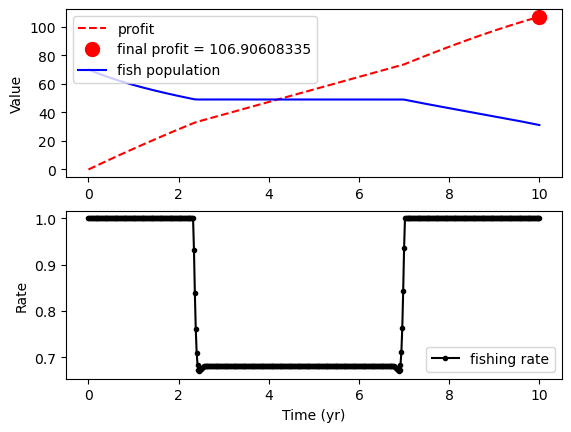

In [47]:
#https://stackoverflow.com/questions/59553511/constraint-on-objective-function-in-python-gekko

from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# create GEKKO model
m = GEKKO()

# time points
n=501
m.time = np.linspace(0,10,n)

# constants
E = 1
c = 17.5
r = 0.71
k = 80.5
U_max = 20

# fishing rate
u = m.MV(value=1,lb=0,ub=1)
u.STATUS = 1
u.DCOST = 0

# fish population
x = m.Var(value=70)

# fish population balance
m.Equation(x.dt() == r*x*(1-x/k)-u*U_max)

# objective (profit)
J = m.Var(value=0)
# final objective
Jf = m.FV()
Jf.STATUS = 1
m.Connection(Jf,J,pos2='end')
m.Equation(J.dt() == (E-c/x)*u*U_max)
# maximize profit
m.Maximize(Jf)

# options
m.options.IMODE = 6  # optimal control
m.options.NODES = 3  # collocation nodes
m.options.SOLVER = 3 # solver (IPOPT)

# solve optimization problem
m.solve()

# print profit
print('Optimal Profit: ' + str(Jf.value[0]))

# plot results
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time,J.value,'r--',label='profit')
plt.plot(m.time[-1],Jf.value[0],'ro',markersize=10,\
         label='final profit = '+str(Jf.value[0]))
plt.plot(m.time,x.value,'b-',label='fish population')
plt.ylabel('Value')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k.-',label='fishing rate')
plt.ylabel('Rate')
plt.xlabel('Time (yr)')
plt.legend()
plt.show()

In [48]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100']]
df['target'] = 0.55
target = df['target']

def objective(params):
    m = GEKKO(remote=False)
    P = m.Param(value=df['premio'].values)
    C = m.Param(value=df['Act_cost'].values)
    X = m.Array(m.Var, 26)
    
    expr = (np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
                   0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3])) / 
            (1 + np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) - 
                        0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]))))
    
    m.Minimize(expr * (P - C))
    
    m.Equation(target - expr)
    
    m.options.SOLVER = 1
    m.solve(disp=False, debug=False)
    
    obj = m.options.objfcnval
    status = STATUS_OK if m.options.APPSTATUS == 1 else STATUS_FAIL
    
    m.cleanup()
    return {'loss': obj, 'status': status, 'x': X}

space = {}  # Defina o espaço de busca conforme necessário
best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

IndexError: list index out of range

In [49]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, hp

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100']]
df['target'] = 0.55
target = df['target']

def objective(params):
    m = GEKKO(remote=False)
    P = m.Param(value=df['premio'].values)
    C = m.Param(value=df['Act_cost'].values)
    X = m.Array(m.Var, 26)
    
    expr = (np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) -
                   0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3])) / 
            (1 + np.exp(1.3356 - 0.2576 * np.log(P) + 1.3647 * (P / X[0]) - 0.8782 * np.log(P / X[1]) - 
                        0.795 * np.log(P / X[2]) - 1.6731 * np.log(P / X[3]))))
    
    m.Minimize(expr * (P - C))
    
    m.Equation(target - expr)
    
    m.options.SOLVER = 1
    m.solve(disp=False, debug=False)
    
    obj = m.options.objfcnval
    status = STATUS_OK if m.options.APPSTATUS == 1 else STATUS_FAIL
    
    m.cleanup()
    return {'loss': obj, 'status': status, 'x': X}

# Definir o espaço de busca
space = {
    'param1': hp.uniform('param1', 0, 1),
    'param2': hp.uniform('param2', 0, 1),
    # Adicione mais parâmetros conforme necessário
}

best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: loop of ufunc does not support argument 0 of type GK_Operators which has no callable log method



  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]


TypeError: loop of ufunc does not support argument 0 of type GK_Operators which has no callable log method

In [50]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, hp

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100']]
df['target'] = 0.55
target = df['target']

def objective(params):
    m = GEKKO(remote=False)
    P = m.Param(value=df['premio'].values)
    C = m.Param(value=df['Act_cost'].values)
    X = m.Array(m.Var, 26)
    
    expr = (m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
                   0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3])) / 
            (1 + m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) - 
                        0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]))))
    
    m.Minimize(expr * (P - C))
    
    m.Equation(target - expr)
    
    m.options.SOLVER = 1
    m.solve(disp=False, debug=False)
    
    obj = m.options.objfcnval
    status = STATUS_OK if m.options.APPSTATUS == 1 else STATUS_FAIL
    
    m.cleanup()
    return {'loss': obj, 'status': status, 'x': X}

# Definir o espaço de busca
space = {
    'param1': hp.uniform('param1', 0, 1),
    'param2': hp.uniform('param2', 0, 1),
    # Adicione mais parâmetros conforme necessário
}

best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: This steady-state IMODE only allows scalar values.



  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]


Exception: This steady-state IMODE only allows scalar values.

In [51]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, hp

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100']]
df['target'] = 0.55
target = df['target']

def objective(params):
    m = GEKKO(remote=False)
    m.options.IMODE = 2  # Modo de otimização dinâmica
    P = m.Param(value=df['premio'].values)
    C = m.Param(value=df['Act_cost'].values)
    X = m.Array(m.Var, 26)
    
    expr = (m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
                   0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3])) / 
            (1 + m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) - 
                        0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]))))
    
    m.Minimize(expr * (P - C))
    
    m.Equation(target - expr)
    
    m.options.SOLVER = 1
    m.solve(disp=False, debug=False)
    
    obj = m.options.objfcnval
    status = STATUS_OK if m.options.APPSTATUS == 1 else STATUS_FAIL
    
    m.cleanup()
    return {'loss': obj, 'status': status, 'x': X}

# Definir o espaço de busca
space = {
    'param1': hp.uniform('param1', 0, 1),
    'param2': hp.uniform('param2', 0, 1),
    # Adicione mais parâmetros conforme necessário
}

best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

Error: 'results.json' not found. Check above for additional error details                                              
  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: [Errno 2] No such file or directory: 'C:\\Users\\flcoelho\\AppData\\Local\\Temp\\tmp3k3c3_0pgk_model10\\options.json'



  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\flcoelho\\AppData\\Local\\Temp\\tmp3k3c3_0pgk_model10\\options.json'

In [52]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, hp
import os

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100']]
df['target'] = 0.55
target = df['target']

def objective(params):
    m = GEKKO(remote=False)
    m.options.IMODE = 2  # Modo de otimização dinâmica
    m.path = os.path.join(os.getcwd(), 'gekko')  # Defina o diretório de trabalho
    if not os.path.exists(m.path):
        os.makedirs(m.path)
    
    P = m.Param(value=df['premio'].values)
    C = m.Param(value=df['Act_cost'].values)
    X = m.Array(m.Var, 26)
    
    expr = (m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) -
                   0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3])) / 
            (1 + m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X[0]) - 0.8782 * m.log(P / X[1]) - 
                        0.795 * m.log(P / X[2]) - 1.6731 * m.log(P / X[3]))))
    
    m.Minimize(expr * (P - C))
    
    m.Equation(target - expr)
    
    m.options.SOLVER = 1
    m.solve(disp=False, debug=False)
    
    obj = m.options.objfcnval
    status = STATUS_OK if m.options.APPSTATUS == 1 else STATUS_FAIL
    
    m.cleanup()
    return {'loss': obj, 'status': status, 'x': X}

# Definir o espaço de busca
space = {
    'param1': hp.uniform('param1', 0, 1),
    'param2': hp.uniform('param2', 0, 1),
    # Adicione mais parâmetros conforme necessário
}

best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

Error: 'results.json' not found. Check above for additional error details                                              
  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: [Errno 2] No such file or directory: 'C:\\Users\\flcoelho\\AppData\\Local\\Temp\\tmpjk3omxc0gk_model11\\options.json'



  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\flcoelho\\AppData\\Local\\Temp\\tmpjk3omxc0gk_model11\\options.json'

In [ ]:
from gekko import GEKKO    
import numpy as np
#modelo inicial
m = GEKKO(remote=False)
x = m.Array(m.Var,4,value=1,lb=1,ub=5)
x1,x2,x3,x4 = x
# change initial values
x2.value = 5; x3.value = 5
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Minimize(x1*x4*(x1+x2+x3)+x3)
m.solve(disp=False)

In [64]:
from gekko import GEKKO    
import numpy as np

# Modelo inicial com o argumento remote
m = GEKKO(remote=False)

# Definindo o parâmetro
eq = m.Param(value=40)

# Variáveis iniciais
x1, x2, x3, x4 = [m.Var() for i in range(4)]

# Valor inicial
x1.value = 1
x2.value = 5
x3.value = 5
x4.value = 1

# Limites inferiores
x1.lower = 1
x2.lower = 1
x3.lower = 1
x4.lower = 1

# Limites superiores
x1.upper = 5
x2.upper = 5
x3.upper = 5
x4.upper = 5

# Equações
m.Equation(x1 * x2 * x3 * x4 >= 25)
m.Equation(x1**2 + x2**2 + x3**2 + x4**2 == eq)

# Objetivo
m.Obj(x1 * x4 * (x1 + x2 + x3) + x3)

# Otimização global
m.options.IMODE = 3

# Resolver
m.solve()

# Resultados
print('')
print('results')
print('x1:', x1.value)
print('x2:', x2.value)
print('x3:', x3.value)
print('x4:', x4.value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  6
   Intermediates:  0
   Connections  :  0
   Equations    :  3
   Residuals    :  3
 
 Number of state variables:    5
 Number of total equations: -  2
 Number of slack variables: -  1
 ---------------------------------------
 Degrees of freedom       :    2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
     

In [65]:
corrigir o algotimo abaixo

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)



df['target'] = 0.55

target = sp.sum(df['target'])

lb = df['LB']
ub = df['UB']
p =  df['premio']
x1 = df['premio']
x2 = df['GBM_mercado']
x3 = df['Premio_IC_100']
C= df['Act_cost']

#gumento remote
m = GEKKO(remote=False)

# Definindo o parâmetro
eq = m.Param(value=target)

# Variáveis iniciais
P,X1, X2, X3 = [m.Var() for i in range(4)]

# Valor inicial
p.value = p*1.1

# Limites inferiores
p.lower = lb

# Limites superiores
p.upper = ub

# Equações
ineq1 = ((m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X1) - 0.8782 * m.log(P / X2) -
                   0.795 * m.log(P / X3))) / 
            (1 + m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X1) - 0.8782 * m.log(P / X2) - 
                        0.795 * m.log(P / X3) )) ) 
m.Equation(ineq1 == eq)

# Objetivo
   
expr = ((m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X1) - 0.8782 * m.log(P / X2) -
                   0.795 * m.log(P / X3))) / 
            (1 + m.exp(1.3356 - 0.2576 * m.log(P) + 1.3647 * (P / X1) - 0.8782 * m.log(P / X2) - 
                        0.795 * m.log(P / X3) )) ) *(P-C)

m.Obj(expr)

# Otimização global
m.options.IMODE = 3

# Resolver
m.solve()

# Resultados
print('')
print('results')



NameError: name 'sp' is not defined

In [67]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

df['target'] = 0.55

target = df['target'].sum()

lb = df['LB'].values
ub = df['UB'].values
p = df['premio'].values
x1 = df['premio'].values
x2 = df['GBM_mercado'].values
x3 = df['Premio_IC_100'].values
C = df['Act_cost'].values

# Argumento remote
m = GEKKO(remote=False)

# Definindo o parâmetro
eq = m.Param(value=target)

# Variáveis iniciais
P = m.Array(m.Var, 10)
X1 = m.Array(m.Var, 10)
X2 = m.Array(m.Var, 10)
X3 = m.Array(m.Var, 10)

# Valor inicial
for i in range(10):
    P[i].value = p[i] * 1.1
    P[i].lower = lb[i]
    P[i].upper = ub[i]

# Equações
for i in range(10):
    ineq1 = ((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                    0.795 * m.log(P[i] / X3[i]))) / 
             (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                         0.795 * m.log(P[i] / X3[i]))))
    m.Equation(ineq1 == eq)

# Objetivo
expr = [((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                0.795 * m.log(P[i] / X3[i]))) / 
        (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                    0.795 * m.log(P[i] / X3[i])))) * (P[i] - C[i]) for i in range(10)]

m.Obj(sum(expr))

# Otimização dinâmica
m.options.IMODE = 2

# Resolver
m.solve()

# Resultados
print('')
print('results')
for i in range(10):
    print(f'P[{i}]:', P[i].value)
    print(f'X1[{i}]:', X1[i].value)
    print(f'X2[{i}]:', X2[i].value)
    print(f'X3[{i}]:', X3[i].value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 @error: Equation Definition
 Equation without an equality (=) or inequality (>,<)
 144.8376372869.6984010782.7943547146.37434895.93978297])))
 STOPPING...



Exception: @error: Equation Definition
 Equation without an equality (=) or inequality (>,<)
 144.8376372869.6984010782.7943547146.37434895.93978297])))
 STOPPING...


In [68]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

df['target'] = 0.55

target = df['target'].sum()

lb = df['LB'].values
ub = df['UB'].values
p = df['premio'].values
x1 = df['premio'].values
x2 = df['GBM_mercado'].values
x3 = df['Premio_IC_100'].values
C = df['Act_cost'].values

# Argumento remote
m = GEKKO(remote=False)

# Definindo o parâmetro
eq = m.Param(value=target)

# Variáveis iniciais
P = m.Array(m.Var, 10)
X1 = m.Array(m.Var, 10)
X2 = m.Array(m.Var, 10)
X3 = m.Array(m.Var, 10)

# Valor inicial
for i in range(10):
    P[i].value = p[i] * 1.1
    P[i].lower = lb[i]
    P[i].upper = ub[i]

# Equações
for i in range(10):
    ineq1 = ((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                    0.795 * m.log(P[i] / X3[i]))) / 
             (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                         0.795 * m.log(P[i] / X3[i]))))
    m.Equation(ineq1 == eq)

# Objetivo
expr = [((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                0.795 * m.log(P[i] / X3[i]))) / 
        (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                    0.795 * m.log(P[i] / X3[i])))) * (P[i] - C[i]) for i in range(10)]

m.Obj(sum(expr))

# Otimização dinâmica
m.options.IMODE = 2

# Resolver
m.solve()

# Resultados
print('')
print('results')
for i in range(10):
    print(f'P[{i}]:', P[i].value)
    print(f'X1[{i}]:', X1[i].value)
    print(f'X2[{i}]:', X2[i].value)
    print(f'X3[{i}]:', X3[i].value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  41
   Intermediates:  0
   Connections  :  0
   Equations    :  11
   Residuals    :  11
 
 Number of state variables:    40
 Number of total equations: -  10
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    30
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL)

Exception: @error: Solution Not Found


In [69]:
import numpy as np
import pandas as pd
from gekko import GEKKO

# Gerar dados
data = {
    'LB': np.random.uniform(100, 200, 10),
    'UB': np.random.uniform(300, 400, 10),
    'Act_cost': np.random.uniform(50, 150, 10),
    'premio': np.random.uniform(200, 350, 10),
    'is_casco_ofer': np.random.randint(0, 2, 10),
    'GBM_mercado': np.random.uniform(0.5, 1.5, 10),
    'Premio_IC_100': np.random.uniform(100, 200, 10)
}

df = pd.DataFrame(data)

df['target'] = 0.55

target = df['target'].sum()

lb = df['LB'].values
ub = df['UB'].values
p = df['premio'].values
x1 = df['premio'].values
x2 = df['GBM_mercado'].values
x3 = df['Premio_IC_100'].values
C = df['Act_cost'].values

# Argumento remote
m = GEKKO(remote=False)

# Definindo o parâmetro
eq = m.Param(value=target)

# Variáveis iniciais
P = m.Array(m.Var, 10)
X1 = m.Array(m.Var, 10)
X2 = m.Array(m.Var, 10)
X3 = m.Array(m.Var, 10)

# Valor inicial
for i in range(10):
    P[i].value = p[i] * 1.1
    P[i].lower = lb[i]
    P[i].upper = ub[i]
    X1[i].value = 1.0
    X2[i].value = 1.0
    X3[i].value = 1.0

# Equações
for i in range(10):
    ineq1 = ((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                    0.795 * m.log(P[i] / X3[i]))) / 
             (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                         0.795 * m.log(P[i] / X3[i]))))
    m.Equation(ineq1 == eq)

# Objetivo
expr = [((m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) -
                0.795 * m.log(P[i] / X3[i]))) / 
        (1 + m.exp(1.3356 - 0.2576 * m.log(P[i]) + 1.3647 * (P[i] / X1[i]) - 0.8782 * m.log(P[i] / X2[i]) - 
                    0.795 * m.log(P[i] / X3[i])))) * (P[i] - C[i]) for i in range(10)]

m.Obj(sum(expr))

# Otimização dinâmica
m.options.IMODE = 2

# Resolver
m.solve()

# Resultados
print('')
print('results')
for i in range(10):
    print(f'P[{i}]:', P[i].value)
    print(f'X1[{i}]:', X1[i].value)
    print(f'X2[{i}]:', X2[i].value)
    print(f'X3[{i}]:', X3[i].value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  41
   Intermediates:  0
   Connections  :  0
   Equations    :  11
   Residuals    :  11
 
 Number of state variables:    40
 Number of total equations: -  10
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    30
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL)

Exception: @error: Solution Not Found
